In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation#,spread_pred_interpretation
from regain.hmm.utils_pred import Value_from_returns,thetas_comparison
import pickle as pkl
from notebooks.hmm.pred_func import pred_regression_methods
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [20]:
N_samples = 2000
N_states = 5
N_TS = 3
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain_random',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 30

[2002.51574818 2001.64062033 2006.99748862]


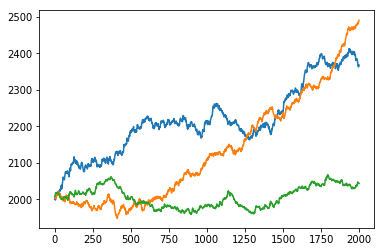

In [21]:
p_vec_0 = np.random.uniform(0,10,N_TS)+2000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

In [8]:
N_pred = 30

In [ ]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(dataset['data'],
                                   Data,
                                   np.linspace(0,50,10),
                                   [N_states],
                                   N_retrain = N_pred,
                                   N_val = 10,
                                   p=2,
                                   N_test = N_pred,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg')

  0%|          | 0/1 [00:00<?, ?it/s]

Prev 0 Var 0



100%|██████████| 10/10 [6:04:15<00:00, 2185.56s/it]

(22.22222222222222, 5)
1.7596063568116704



  0%|          | 0/1 [00:00<?, ?it/s]

MAE pred 0 Var 0 : 1.5262149301488641
Prev 0 Var 1



  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
print(np.mean(abs(Val_Pred-Data[-N_pred:,:])))
print(Data[-N_pred:,:])
print(Val_Pred)
res_regre.append(Val_Pred)
methods.append('HHM_GGM')

1.9964120303452106
[[1103.68222121 1871.51171546 2326.11984243 2822.63556127 1533.14515252]
 [1104.10879037 1872.6731043  2324.606485   2825.49263319 1530.31143914]
 [1101.00059414 1873.09940403 2325.02108419 2827.25062852 1532.09620954]
 [1100.63697231 1873.42317633 2325.62574972 2827.66583951 1530.52650162]
 [1101.92664183 1875.79307816 2324.9884327  2831.43385463 1528.49967141]
 [1098.18319857 1876.20285156 2325.85550656 2833.22360806 1530.01110343]
 [1096.19327674 1875.23210307 2327.66603111 2834.46040135 1530.92324227]
 [1094.9870677  1871.79121713 2332.15983317 2835.93675975 1530.33211006]
 [1093.00911525 1872.43437067 2331.37970301 2839.14137797 1530.15946671]
 [1087.52004184 1868.16311252 2333.95424299 2840.89034356 1533.12040688]
 [1089.42225872 1867.01197149 2334.94966587 2843.94561215 1532.13815338]
 [1086.86922235 1866.70429529 2335.13284687 2843.55357466 1532.3466368 ]
 [1087.0927654  1867.45377715 2335.48377716 2843.13412323 1530.55801656]
 [1087.22825148 1866.81182931 23

[1]	valid_0's l1: 1.40136	valid_0's l2: 3.00327
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.38794	valid_0's l2: 3.00215
[3]	valid_0's l1: 1.34635	valid_0's l2: 2.90711
[4]	valid_0's l1: 1.3171	valid_0's l2: 2.86659
[5]	valid_0's l1: 1.31511	valid_0's l2: 2.87595
[6]	valid_0's l1: 1.30233	valid_0's l2: 2.87452
[7]	valid_0's l1: 1.32433	valid_0's l2: 2.92783
[8]	valid_0's l1: 1.32572	valid_0's l2: 2.90134
[9]	valid_0's l1: 1.32965	valid_0's l2: 2.95571
[10]	valid_0's l1: 1.31008	valid_0's l2: 2.92645
[11]	valid_0's l1: 1.32443	valid_0's l2: 3.00819
[12]	valid_0's l1: 1.34608	valid_0's l2: 3.02731
[13]	valid_0's l1: 1.37629	valid_0's l2: 3.12588
[14]	valid_0's l1: 1.39233	valid_0's l2: 3.17305
Early stopping, best iteration is:
[4]	valid_0's l1: 1.3171	valid_0's l2: 2.86659
[1]	valid_0's l1: 2.07773	valid_0's l2: 5.89582
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.05598	valid_0's l2: 5.68676
[3]	valid_0's l1: 2.0519

[12]	valid_0's l1: 2.46369	valid_0's l2: 6.66703
[13]	valid_0's l1: 2.47743	valid_0's l2: 6.78829
[14]	valid_0's l1: 2.48495	valid_0's l2: 6.87655
[15]	valid_0's l1: 2.46107	valid_0's l2: 6.76248
[16]	valid_0's l1: 2.46868	valid_0's l2: 6.79208
[17]	valid_0's l1: 2.49327	valid_0's l2: 6.90292
[18]	valid_0's l1: 2.5152	valid_0's l2: 7.06021
Early stopping, best iteration is:
[8]	valid_0's l1: 2.42172	valid_0's l2: 6.43867
[1]	valid_0's l1: 2.23653	valid_0's l2: 6.1958
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.25597	valid_0's l2: 6.25056
[3]	valid_0's l1: 2.2711	valid_0's l2: 6.30888
[4]	valid_0's l1: 2.2677	valid_0's l2: 6.3132
[5]	valid_0's l1: 2.26245	valid_0's l2: 6.23376
[6]	valid_0's l1: 2.28583	valid_0's l2: 6.38766
[7]	valid_0's l1: 2.2815	valid_0's l2: 6.36289
[8]	valid_0's l1: 2.26389	valid_0's l2: 6.28015
[9]	valid_0's l1: 2.27653	valid_0's l2: 6.36673
[10]	valid_0's l1: 2.28499	valid_0's l2: 6.51971
[11]	valid_0's l1: 2.2776	valid_0's l2

[6]	valid_0's l1: 2.17355	valid_0's l2: 5.84613
[7]	valid_0's l1: 2.16943	valid_0's l2: 5.82217
[8]	valid_0's l1: 2.14942	valid_0's l2: 5.71183
[9]	valid_0's l1: 2.14772	valid_0's l2: 5.67554
[10]	valid_0's l1: 2.13371	valid_0's l2: 5.65135
[11]	valid_0's l1: 2.15398	valid_0's l2: 5.69439
Early stopping, best iteration is:
[1]	valid_0's l1: 2.13352	valid_0's l2: 5.79903
[1]	valid_0's l1: 1.44417	valid_0's l2: 2.51521
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.38706	valid_0's l2: 2.36719
[3]	valid_0's l1: 1.33489	valid_0's l2: 2.23295
[4]	valid_0's l1: 1.2826	valid_0's l2: 2.10793
[5]	valid_0's l1: 1.24382	valid_0's l2: 2.0033
[6]	valid_0's l1: 1.21499	valid_0's l2: 1.95014
[7]	valid_0's l1: 1.15198	valid_0's l2: 1.80377
[8]	valid_0's l1: 1.10177	valid_0's l2: 1.69605
[9]	valid_0's l1: 1.08132	valid_0's l2: 1.66826
[10]	valid_0's l1: 1.03143	valid_0's l2: 1.57188
[11]	valid_0's l1: 1.00148	valid_0's l2: 1.51665
[12]	valid_0's l1: 0.964565	valid_0's 

[19]	valid_0's l1: 0.876485	valid_0's l2: 1.17299
[20]	valid_0's l1: 0.870409	valid_0's l2: 1.14846
[21]	valid_0's l1: 0.859083	valid_0's l2: 1.10806
[22]	valid_0's l1: 0.855257	valid_0's l2: 1.07515
[23]	valid_0's l1: 0.852885	valid_0's l2: 1.06526
[24]	valid_0's l1: 0.85135	valid_0's l2: 1.0593
[25]	valid_0's l1: 0.851752	valid_0's l2: 1.04281
[26]	valid_0's l1: 0.847017	valid_0's l2: 1.0321
[27]	valid_0's l1: 0.839738	valid_0's l2: 1.01717
[28]	valid_0's l1: 0.833097	valid_0's l2: 1.00714
[29]	valid_0's l1: 0.823711	valid_0's l2: 1.00272
[30]	valid_0's l1: 0.809678	valid_0's l2: 0.985227
[31]	valid_0's l1: 0.812824	valid_0's l2: 0.986049
[32]	valid_0's l1: 0.805653	valid_0's l2: 0.979755
[33]	valid_0's l1: 0.798688	valid_0's l2: 0.962918
[34]	valid_0's l1: 0.79716	valid_0's l2: 0.955341
[35]	valid_0's l1: 0.795809	valid_0's l2: 0.951392
[36]	valid_0's l1: 0.792163	valid_0's l2: 0.942275
[37]	valid_0's l1: 0.803346	valid_0's l2: 0.963874
[38]	valid_0's l1: 0.803025	valid_0's l2: 0.95

[2]	valid_0's l1: 1.89346	valid_0's l2: 3.77245
[3]	valid_0's l1: 1.86714	valid_0's l2: 3.67008
[4]	valid_0's l1: 1.859	valid_0's l2: 3.64191
[5]	valid_0's l1: 1.85432	valid_0's l2: 3.62476
[6]	valid_0's l1: 1.8431	valid_0's l2: 3.61174
[7]	valid_0's l1: 1.86058	valid_0's l2: 3.66159
[8]	valid_0's l1: 1.85408	valid_0's l2: 3.60246
[9]	valid_0's l1: 1.85634	valid_0's l2: 3.61491
[10]	valid_0's l1: 1.86573	valid_0's l2: 3.64877
[11]	valid_0's l1: 1.88446	valid_0's l2: 3.73268
[12]	valid_0's l1: 1.89854	valid_0's l2: 3.78889
[13]	valid_0's l1: 1.93633	valid_0's l2: 3.92232
[14]	valid_0's l1: 1.92328	valid_0's l2: 3.8603
[15]	valid_0's l1: 1.91117	valid_0's l2: 3.79272
[16]	valid_0's l1: 1.89457	valid_0's l2: 3.7564
Early stopping, best iteration is:
[6]	valid_0's l1: 1.8431	valid_0's l2: 3.61174
[1]	valid_0's l1: 1.7442	valid_0's l2: 4.3416
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.74241	valid_0's l2: 4.31771
[3]	valid_0's l1: 1.73601	valid_0's l2: 4

[38]	valid_0's l1: 1.35175	valid_0's l2: 3.26374
[39]	valid_0's l1: 1.36976	valid_0's l2: 3.28467
[40]	valid_0's l1: 1.36407	valid_0's l2: 3.19646
[41]	valid_0's l1: 1.37102	valid_0's l2: 3.21201
[42]	valid_0's l1: 1.37019	valid_0's l2: 3.19968
Early stopping, best iteration is:
[32]	valid_0's l1: 1.32338	valid_0's l2: 3.22482
[1]	valid_0's l1: 1.56108	valid_0's l2: 4.4099
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.56268	valid_0's l2: 4.47372
[3]	valid_0's l1: 1.52971	valid_0's l2: 4.40216
[4]	valid_0's l1: 1.50906	valid_0's l2: 4.32034
[5]	valid_0's l1: 1.5118	valid_0's l2: 4.27054
[6]	valid_0's l1: 1.51361	valid_0's l2: 4.16976
[7]	valid_0's l1: 1.52174	valid_0's l2: 4.18302
[8]	valid_0's l1: 1.52496	valid_0's l2: 4.1338
[9]	valid_0's l1: 1.51036	valid_0's l2: 4.07774
[10]	valid_0's l1: 1.50217	valid_0's l2: 4.05255
[11]	valid_0's l1: 1.50234	valid_0's l2: 3.99984
[12]	valid_0's l1: 1.44893	valid_0's l2: 3.86835
[13]	valid_0's l1: 1.4418	valid_0'

[12]	valid_0's l1: 1.67932	valid_0's l2: 4.22388
Early stopping, best iteration is:
[2]	valid_0's l1: 1.58688	valid_0's l2: 3.84352
[1]	valid_0's l1: 1.70582	valid_0's l2: 4.79645
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.70914	valid_0's l2: 4.80174
[3]	valid_0's l1: 1.71114	valid_0's l2: 4.79871
[4]	valid_0's l1: 1.7111	valid_0's l2: 4.76307
[5]	valid_0's l1: 1.7281	valid_0's l2: 4.82327
[6]	valid_0's l1: 1.72194	valid_0's l2: 4.77313
[7]	valid_0's l1: 1.74239	valid_0's l2: 4.81484
[8]	valid_0's l1: 1.74662	valid_0's l2: 4.79777
[9]	valid_0's l1: 1.72181	valid_0's l2: 4.75305
[10]	valid_0's l1: 1.74285	valid_0's l2: 4.80393
[11]	valid_0's l1: 1.73096	valid_0's l2: 4.7365
Early stopping, best iteration is:
[1]	valid_0's l1: 1.70582	valid_0's l2: 4.79645
[1]	valid_0's l1: 1.82687	valid_0's l2: 4.34686
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.79024	valid_0's l2: 4.20832
[3]	valid_0's l1: 1.74453	valid_0's l2: 

[54]	valid_0's l1: 2.04831	valid_0's l2: 6.18016
[55]	valid_0's l1: 2.02838	valid_0's l2: 6.06065
[56]	valid_0's l1: 2.01337	valid_0's l2: 5.98579
[57]	valid_0's l1: 2.00643	valid_0's l2: 5.97238
[58]	valid_0's l1: 2.01283	valid_0's l2: 5.95495
[59]	valid_0's l1: 1.98955	valid_0's l2: 5.86319
[60]	valid_0's l1: 1.98347	valid_0's l2: 5.80973
[61]	valid_0's l1: 1.9781	valid_0's l2: 5.79572
[62]	valid_0's l1: 1.9822	valid_0's l2: 5.84847
[63]	valid_0's l1: 1.96773	valid_0's l2: 5.78346
[64]	valid_0's l1: 1.95762	valid_0's l2: 5.76307
[65]	valid_0's l1: 1.94622	valid_0's l2: 5.74755
[66]	valid_0's l1: 1.96615	valid_0's l2: 5.74339
[67]	valid_0's l1: 1.97149	valid_0's l2: 5.77331
[68]	valid_0's l1: 1.96803	valid_0's l2: 5.743
[69]	valid_0's l1: 1.951	valid_0's l2: 5.6947
[70]	valid_0's l1: 1.96232	valid_0's l2: 5.75812
[71]	valid_0's l1: 1.96061	valid_0's l2: 5.72018
[72]	valid_0's l1: 1.98357	valid_0's l2: 5.81167
[73]	valid_0's l1: 1.98072	valid_0's l2: 5.79161
[74]	valid_0's l1: 1.98302	

[39]	valid_0's l1: 2.04769	valid_0's l2: 5.72895
[40]	valid_0's l1: 2.03874	valid_0's l2: 5.71175
[41]	valid_0's l1: 2.02404	valid_0's l2: 5.64155
[42]	valid_0's l1: 2.00079	valid_0's l2: 5.56322
[43]	valid_0's l1: 1.98718	valid_0's l2: 5.50006
[44]	valid_0's l1: 1.97171	valid_0's l2: 5.43611
[45]	valid_0's l1: 1.96469	valid_0's l2: 5.38962
[46]	valid_0's l1: 1.95077	valid_0's l2: 5.36952
[47]	valid_0's l1: 1.95258	valid_0's l2: 5.34329
[48]	valid_0's l1: 1.96408	valid_0's l2: 5.39215
[49]	valid_0's l1: 1.98313	valid_0's l2: 5.43554
[50]	valid_0's l1: 1.9779	valid_0's l2: 5.42839
[51]	valid_0's l1: 1.97631	valid_0's l2: 5.4453
[52]	valid_0's l1: 1.96938	valid_0's l2: 5.42686
[53]	valid_0's l1: 1.96616	valid_0's l2: 5.41166
[54]	valid_0's l1: 1.94028	valid_0's l2: 5.28609
[55]	valid_0's l1: 1.9335	valid_0's l2: 5.25302
[56]	valid_0's l1: 1.93707	valid_0's l2: 5.26061
[57]	valid_0's l1: 1.92653	valid_0's l2: 5.17086
[58]	valid_0's l1: 1.93221	valid_0's l2: 5.18114
[59]	valid_0's l1: 1.92

[3]	valid_0's l1: 2.32101	valid_0's l2: 7.47265
[4]	valid_0's l1: 2.33891	valid_0's l2: 7.53279
[5]	valid_0's l1: 2.33815	valid_0's l2: 7.4741
[6]	valid_0's l1: 2.33323	valid_0's l2: 7.41539
[7]	valid_0's l1: 2.37501	valid_0's l2: 7.59453
[8]	valid_0's l1: 2.38283	valid_0's l2: 7.56538
[9]	valid_0's l1: 2.38643	valid_0's l2: 7.62526
[10]	valid_0's l1: 2.38413	valid_0's l2: 7.59743
[11]	valid_0's l1: 2.38762	valid_0's l2: 7.62459
[12]	valid_0's l1: 2.38604	valid_0's l2: 7.58911
[13]	valid_0's l1: 2.37936	valid_0's l2: 7.55975
Early stopping, best iteration is:
[3]	valid_0's l1: 2.32101	valid_0's l2: 7.47265
[1]	valid_0's l1: 1.91037	valid_0's l2: 6.08089
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.92873	valid_0's l2: 6.12884
[3]	valid_0's l1: 1.94124	valid_0's l2: 6.22125
[4]	valid_0's l1: 1.95534	valid_0's l2: 6.3294
[5]	valid_0's l1: 1.96109	valid_0's l2: 6.38684
[6]	valid_0's l1: 1.9553	valid_0's l2: 6.31896
[7]	valid_0's l1: 1.95613	valid_0's l2:

[33]	valid_0's l1: 2.11823	valid_0's l2: 6.25356
[34]	valid_0's l1: 2.14507	valid_0's l2: 6.40178
[35]	valid_0's l1: 2.1327	valid_0's l2: 6.38863
[36]	valid_0's l1: 2.14394	valid_0's l2: 6.49458
[37]	valid_0's l1: 2.1462	valid_0's l2: 6.51588
[38]	valid_0's l1: 2.14645	valid_0's l2: 6.50914
[39]	valid_0's l1: 2.15467	valid_0's l2: 6.56544
[40]	valid_0's l1: 2.15738	valid_0's l2: 6.57359
[41]	valid_0's l1: 2.15901	valid_0's l2: 6.52904
[42]	valid_0's l1: 2.14729	valid_0's l2: 6.43668
[43]	valid_0's l1: 2.14187	valid_0's l2: 6.38129
Early stopping, best iteration is:
[33]	valid_0's l1: 2.11823	valid_0's l2: 6.25356
[1]	valid_0's l1: 1.40547	valid_0's l2: 3.96783
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.41153	valid_0's l2: 3.97622
[3]	valid_0's l1: 1.40393	valid_0's l2: 4.0195
[4]	valid_0's l1: 1.40037	valid_0's l2: 4.03188
[5]	valid_0's l1: 1.38326	valid_0's l2: 4.07077
[6]	valid_0's l1: 1.38184	valid_0's l2: 3.99729
[7]	valid_0's l1: 1.38161	valid

[5]	valid_0's l1: 1.37863	valid_0's l2: 2.21012
[6]	valid_0's l1: 1.40474	valid_0's l2: 2.247
[7]	valid_0's l1: 1.41159	valid_0's l2: 2.27329
[8]	valid_0's l1: 1.41816	valid_0's l2: 2.29243
[9]	valid_0's l1: 1.43537	valid_0's l2: 2.31713
[10]	valid_0's l1: 1.43556	valid_0's l2: 2.30982
[11]	valid_0's l1: 1.43412	valid_0's l2: 2.31513
[12]	valid_0's l1: 1.43756	valid_0's l2: 2.33594
Early stopping, best iteration is:
[2]	valid_0's l1: 1.37065	valid_0's l2: 2.23812
[1]	valid_0's l1: 1.36657	valid_0's l2: 2.87009
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.35339	valid_0's l2: 2.88498
[3]	valid_0's l1: 1.32072	valid_0's l2: 2.8092
[4]	valid_0's l1: 1.30703	valid_0's l2: 2.79432
[5]	valid_0's l1: 1.28606	valid_0's l2: 2.80197
[6]	valid_0's l1: 1.26676	valid_0's l2: 2.79801
[7]	valid_0's l1: 1.27219	valid_0's l2: 2.87333
[8]	valid_0's l1: 1.27305	valid_0's l2: 2.95285
[9]	valid_0's l1: 1.3012	valid_0's l2: 3.02322
[10]	valid_0's l1: 1.30263	valid_0's l2: 

[23]	valid_0's l1: 1.51595	valid_0's l2: 2.77088
[24]	valid_0's l1: 1.49749	valid_0's l2: 2.71138
[25]	valid_0's l1: 1.49324	valid_0's l2: 2.69179
[26]	valid_0's l1: 1.48033	valid_0's l2: 2.64992
[27]	valid_0's l1: 1.47138	valid_0's l2: 2.6219
[28]	valid_0's l1: 1.46858	valid_0's l2: 2.62409
[29]	valid_0's l1: 1.45934	valid_0's l2: 2.59969
[30]	valid_0's l1: 1.46225	valid_0's l2: 2.59068
[31]	valid_0's l1: 1.46126	valid_0's l2: 2.58611
[32]	valid_0's l1: 1.46622	valid_0's l2: 2.59998
[33]	valid_0's l1: 1.47687	valid_0's l2: 2.6335
[34]	valid_0's l1: 1.48736	valid_0's l2: 2.68413
[35]	valid_0's l1: 1.48649	valid_0's l2: 2.668
[36]	valid_0's l1: 1.49224	valid_0's l2: 2.68162
[37]	valid_0's l1: 1.4797	valid_0's l2: 2.63935
[38]	valid_0's l1: 1.47179	valid_0's l2: 2.62637
[39]	valid_0's l1: 1.47915	valid_0's l2: 2.64589
Early stopping, best iteration is:
[29]	valid_0's l1: 1.45934	valid_0's l2: 2.59969
[1]	valid_0's l1: 1.36689	valid_0's l2: 3.10877
Training until validation scores don't i

[55]	valid_0's l1: 1.11415	valid_0's l2: 1.71346
[56]	valid_0's l1: 1.11205	valid_0's l2: 1.71158
[57]	valid_0's l1: 1.10288	valid_0's l2: 1.69421
[58]	valid_0's l1: 1.11131	valid_0's l2: 1.68825
[59]	valid_0's l1: 1.1142	valid_0's l2: 1.66695
Early stopping, best iteration is:
[49]	valid_0's l1: 1.08401	valid_0's l2: 1.67354
[1]	valid_0's l1: 1.24281	valid_0's l2: 2.82213
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.25882	valid_0's l2: 2.85714
[3]	valid_0's l1: 1.24999	valid_0's l2: 2.92581
[4]	valid_0's l1: 1.26513	valid_0's l2: 2.96633
[5]	valid_0's l1: 1.27956	valid_0's l2: 3.04894
[6]	valid_0's l1: 1.2829	valid_0's l2: 3.04173
[7]	valid_0's l1: 1.31244	valid_0's l2: 3.13513
[8]	valid_0's l1: 1.31089	valid_0's l2: 3.17563
[9]	valid_0's l1: 1.31413	valid_0's l2: 3.19231
[10]	valid_0's l1: 1.32068	valid_0's l2: 3.22058
[11]	valid_0's l1: 1.34274	valid_0's l2: 3.22153
Early stopping, best iteration is:
[1]	valid_0's l1: 1.24281	valid_0's l2: 2.82213

[11]	valid_0's l1: 1.92824	valid_0's l2: 4.24975
[12]	valid_0's l1: 1.92723	valid_0's l2: 4.24092
[13]	valid_0's l1: 1.92848	valid_0's l2: 4.25478
[14]	valid_0's l1: 1.97231	valid_0's l2: 4.43667
[15]	valid_0's l1: 2.00599	valid_0's l2: 4.58165
[16]	valid_0's l1: 2.00135	valid_0's l2: 4.56891
[17]	valid_0's l1: 2.01152	valid_0's l2: 4.58148
[18]	valid_0's l1: 1.99595	valid_0's l2: 4.50646
Early stopping, best iteration is:
[8]	valid_0's l1: 1.91629	valid_0's l2: 4.22387
[1]	valid_0's l1: 0.9549	valid_0's l2: 1.62271
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 0.933628	valid_0's l2: 1.51905
[3]	valid_0's l1: 0.900354	valid_0's l2: 1.42259
[4]	valid_0's l1: 0.865154	valid_0's l2: 1.30641
[5]	valid_0's l1: 0.837134	valid_0's l2: 1.2341
[6]	valid_0's l1: 0.829402	valid_0's l2: 1.20932
[7]	valid_0's l1: 0.821723	valid_0's l2: 1.18248
[8]	valid_0's l1: 0.796294	valid_0's l2: 1.1275
[9]	valid_0's l1: 0.78249	valid_0's l2: 1.09855
[10]	valid_0's l1: 0.779196	

[13]	valid_0's l1: 1.18506	valid_0's l2: 2.44679
[14]	valid_0's l1: 1.1984	valid_0's l2: 2.50923
[15]	valid_0's l1: 1.19419	valid_0's l2: 2.49601
[16]	valid_0's l1: 1.20981	valid_0's l2: 2.50958
[17]	valid_0's l1: 1.23502	valid_0's l2: 2.57148
[18]	valid_0's l1: 1.26468	valid_0's l2: 2.6316
[19]	valid_0's l1: 1.26925	valid_0's l2: 2.64559
[20]	valid_0's l1: 1.26676	valid_0's l2: 2.6544
[21]	valid_0's l1: 1.27317	valid_0's l2: 2.68476
[22]	valid_0's l1: 1.25738	valid_0's l2: 2.61857
Early stopping, best iteration is:
[12]	valid_0's l1: 1.18607	valid_0's l2: 2.42133
[1]	valid_0's l1: 1.95108	valid_0's l2: 5.47805
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.93363	valid_0's l2: 5.43011
[3]	valid_0's l1: 1.93693	valid_0's l2: 5.48005
[4]	valid_0's l1: 1.89644	valid_0's l2: 5.3748
[5]	valid_0's l1: 1.89189	valid_0's l2: 5.29348
[6]	valid_0's l1: 1.87564	valid_0's l2: 5.28112
[7]	valid_0's l1: 1.86941	valid_0's l2: 5.20513
[8]	valid_0's l1: 1.85865	valid_0

[2]	valid_0's l1: 2.17025	valid_0's l2: 6.47345
[3]	valid_0's l1: 2.14674	valid_0's l2: 6.35209
[4]	valid_0's l1: 2.10848	valid_0's l2: 6.20957
[5]	valid_0's l1: 2.12797	valid_0's l2: 6.31874
[6]	valid_0's l1: 2.13374	valid_0's l2: 6.37732
[7]	valid_0's l1: 2.10149	valid_0's l2: 6.26377
[8]	valid_0's l1: 2.08947	valid_0's l2: 6.27154
[9]	valid_0's l1: 2.09292	valid_0's l2: 6.32426
[10]	valid_0's l1: 2.06293	valid_0's l2: 6.2423
[11]	valid_0's l1: 2.04536	valid_0's l2: 6.15643
[12]	valid_0's l1: 2.04125	valid_0's l2: 6.14483
[13]	valid_0's l1: 2.04858	valid_0's l2: 6.14463
[14]	valid_0's l1: 2.0481	valid_0's l2: 6.15315
[15]	valid_0's l1: 2.05379	valid_0's l2: 6.19891
[16]	valid_0's l1: 2.07939	valid_0's l2: 6.32418
[17]	valid_0's l1: 2.0588	valid_0's l2: 6.20461
[18]	valid_0's l1: 2.05015	valid_0's l2: 6.09943
[19]	valid_0's l1: 2.01864	valid_0's l2: 5.99576
[20]	valid_0's l1: 2.03741	valid_0's l2: 6.07949
[21]	valid_0's l1: 2.04243	valid_0's l2: 6.07251
[22]	valid_0's l1: 2.07886	vali

[17]	valid_0's l1: 2.08302	valid_0's l2: 5.68025
[18]	valid_0's l1: 2.06211	valid_0's l2: 5.64444
[19]	valid_0's l1: 2.03171	valid_0's l2: 5.56573
[20]	valid_0's l1: 2.03188	valid_0's l2: 5.62532
[21]	valid_0's l1: 2.03147	valid_0's l2: 5.5704
[22]	valid_0's l1: 2.05782	valid_0's l2: 5.74479
[23]	valid_0's l1: 2.06534	valid_0's l2: 5.73757
[24]	valid_0's l1: 2.06221	valid_0's l2: 5.74491
[25]	valid_0's l1: 2.06688	valid_0's l2: 5.73829
[26]	valid_0's l1: 2.05755	valid_0's l2: 5.67902
[27]	valid_0's l1: 2.03126	valid_0's l2: 5.60079
[28]	valid_0's l1: 2.0117	valid_0's l2: 5.53143
[29]	valid_0's l1: 2.00017	valid_0's l2: 5.50849
[30]	valid_0's l1: 1.98827	valid_0's l2: 5.44388
[31]	valid_0's l1: 1.99127	valid_0's l2: 5.49786
[32]	valid_0's l1: 1.95756	valid_0's l2: 5.41516
[33]	valid_0's l1: 1.95444	valid_0's l2: 5.36988
[34]	valid_0's l1: 1.93291	valid_0's l2: 5.33488
[35]	valid_0's l1: 1.92662	valid_0's l2: 5.34734
[36]	valid_0's l1: 1.94551	valid_0's l2: 5.47991
[37]	valid_0's l1: 1.9

[26]	valid_0's l1: 1.57974	valid_0's l2: 3.70568
[27]	valid_0's l1: 1.57068	valid_0's l2: 3.63649
[28]	valid_0's l1: 1.58301	valid_0's l2: 3.7003
[29]	valid_0's l1: 1.58015	valid_0's l2: 3.6943
Early stopping, best iteration is:
[19]	valid_0's l1: 1.56718	valid_0's l2: 3.77171
[1]	valid_0's l1: 2.33973	valid_0's l2: 5.50715
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.31103	valid_0's l2: 5.36942
[3]	valid_0's l1: 2.29131	valid_0's l2: 5.28328
[4]	valid_0's l1: 2.27298	valid_0's l2: 5.20007
[5]	valid_0's l1: 2.28859	valid_0's l2: 5.2775
[6]	valid_0's l1: 2.27274	valid_0's l2: 5.20007
[7]	valid_0's l1: 2.26313	valid_0's l2: 5.15336
[8]	valid_0's l1: 2.28641	valid_0's l2: 5.26413
[9]	valid_0's l1: 2.30233	valid_0's l2: 5.32659
[10]	valid_0's l1: 2.29067	valid_0's l2: 5.267
[11]	valid_0's l1: 2.29088	valid_0's l2: 5.26389
[12]	valid_0's l1: 2.30883	valid_0's l2: 5.34298
[13]	valid_0's l1: 2.3139	valid_0's l2: 5.37081
[14]	valid_0's l1: 2.31726	valid_0's 

[15]	valid_0's l1: 1.70675	valid_0's l2: 4.64724
[16]	valid_0's l1: 1.73229	valid_0's l2: 4.74789
[17]	valid_0's l1: 1.73466	valid_0's l2: 4.65522
[18]	valid_0's l1: 1.73963	valid_0's l2: 4.57836
[19]	valid_0's l1: 1.72826	valid_0's l2: 4.48874
[20]	valid_0's l1: 1.75381	valid_0's l2: 4.53314
[21]	valid_0's l1: 1.76867	valid_0's l2: 4.57851
[22]	valid_0's l1: 1.77501	valid_0's l2: 4.59005
[23]	valid_0's l1: 1.78145	valid_0's l2: 4.60109
[24]	valid_0's l1: 1.78539	valid_0's l2: 4.61958
[25]	valid_0's l1: 1.7953	valid_0's l2: 4.65866
Early stopping, best iteration is:
[15]	valid_0's l1: 1.70675	valid_0's l2: 4.64724
[1]	valid_0's l1: 2.18441	valid_0's l2: 4.82135
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.17768	valid_0's l2: 4.79246
[3]	valid_0's l1: 2.15298	valid_0's l2: 4.68798
[4]	valid_0's l1: 2.13098	valid_0's l2: 4.58948
[5]	valid_0's l1: 2.13509	valid_0's l2: 4.60432
[6]	valid_0's l1: 2.12906	valid_0's l2: 4.56598
[7]	valid_0's l1: 2.11212	val

[22]	valid_0's l1: 1.91188	valid_0's l2: 4.84424
[23]	valid_0's l1: 1.92402	valid_0's l2: 4.87482
[24]	valid_0's l1: 1.92117	valid_0's l2: 4.87398
[25]	valid_0's l1: 1.92072	valid_0's l2: 4.89024
[26]	valid_0's l1: 1.9168	valid_0's l2: 4.8729
[27]	valid_0's l1: 1.91575	valid_0's l2: 4.83631
[28]	valid_0's l1: 1.90817	valid_0's l2: 4.78973
[29]	valid_0's l1: 1.89775	valid_0's l2: 4.76173
[30]	valid_0's l1: 1.90015	valid_0's l2: 4.77647
[31]	valid_0's l1: 1.88652	valid_0's l2: 4.73683
[32]	valid_0's l1: 1.89075	valid_0's l2: 4.73672
[33]	valid_0's l1: 1.90486	valid_0's l2: 4.78162
[34]	valid_0's l1: 1.91824	valid_0's l2: 4.78368
[35]	valid_0's l1: 1.89915	valid_0's l2: 4.70301
[36]	valid_0's l1: 1.90305	valid_0's l2: 4.67264
[37]	valid_0's l1: 1.90565	valid_0's l2: 4.65489
[38]	valid_0's l1: 1.88072	valid_0's l2: 4.522
[39]	valid_0's l1: 1.87727	valid_0's l2: 4.44675
[40]	valid_0's l1: 1.85444	valid_0's l2: 4.37111
[41]	valid_0's l1: 1.83377	valid_0's l2: 4.32534
[42]	valid_0's l1: 1.830

[7]	valid_0's l1: 2.66914	valid_0's l2: 9.87106
[8]	valid_0's l1: 2.67164	valid_0's l2: 9.98054
[9]	valid_0's l1: 2.66752	valid_0's l2: 10.0348
[10]	valid_0's l1: 2.70301	valid_0's l2: 10.1715
[11]	valid_0's l1: 2.72195	valid_0's l2: 10.381
Early stopping, best iteration is:
[1]	valid_0's l1: 2.56121	valid_0's l2: 9.2286
[1]	valid_0's l1: 2.33828	valid_0's l2: 6.53794
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.31625	valid_0's l2: 6.48297
[3]	valid_0's l1: 2.3271	valid_0's l2: 6.58208
[4]	valid_0's l1: 2.32765	valid_0's l2: 6.67448
[5]	valid_0's l1: 2.32907	valid_0's l2: 6.63343
[6]	valid_0's l1: 2.30968	valid_0's l2: 6.55246
[7]	valid_0's l1: 2.29346	valid_0's l2: 6.5127
[8]	valid_0's l1: 2.25759	valid_0's l2: 6.32138
[9]	valid_0's l1: 2.22866	valid_0's l2: 6.20077
[10]	valid_0's l1: 2.20826	valid_0's l2: 6.12313
[11]	valid_0's l1: 2.19978	valid_0's l2: 6.07648
[12]	valid_0's l1: 2.15603	valid_0's l2: 5.88363
[13]	valid_0's l1: 2.13739	valid_0's l2

Train on 1963 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.7983 - val_loss: 1.3748
Epoch 2/50
 - 0s - loss: 1.7701 - val_loss: 1.4423
Epoch 3/50
 - 0s - loss: 1.7590 - val_loss: 1.4606
Epoch 4/50
 - 0s - loss: 1.7538 - val_loss: 1.4684
Epoch 5/50
 - 0s - loss: 1.7496 - val_loss: 1.4741
Epoch 6/50
 - 0s - loss: 1.7462 - val_loss: 1.4784
Epoch 7/50
 - 0s - loss: 1.7428 - val_loss: 1.4762
Epoch 8/50
 - 0s - loss: 1.7397 - val_loss: 1.4769
Epoch 9/50
 - 0s - loss: 1.7368 - val_loss: 1.4839
Epoch 10/50
 - 0s - loss: 1.7341 - val_loss: 1.4906
Epoch 11/50
 - 0s - loss: 1.7315 - val_loss: 1.5040
Epoch 12/50
 - 0s - loss: 1.7289 - val_loss: 1.5109
Epoch 13/50
 - 0s - loss: 1.7265 - val_loss: 1.5192
Epoch 14/50
 - 0s - loss: 1.7241 - val_loss: 1.5283
Epoch 15/50
 - 0s - loss: 1.7218 - val_loss: 1.5376
Epoch 16/50
 - 0s - loss: 1.7195 - val_loss: 1.5384
Epoch 17/50
 - 0s - loss: 1.7171 - val_loss: 1.5433
Epoch 18/50
 - 0s - loss: 1.7149 - val_loss: 1.5495
Epoch 19/50
 - 0s - loss: 1.

Epoch 6/50
 - 0s - loss: 1.2813 - val_loss: 0.4733
Epoch 7/50
 - 0s - loss: 1.2747 - val_loss: 0.4723
Epoch 8/50
 - 0s - loss: 1.2697 - val_loss: 0.4702
Epoch 9/50
 - 0s - loss: 1.2655 - val_loss: 0.4698
Epoch 10/50
 - 0s - loss: 1.2618 - val_loss: 0.4690
Epoch 11/50
 - 0s - loss: 1.2584 - val_loss: 0.4795
Epoch 12/50
 - 0s - loss: 1.2555 - val_loss: 0.4717
Epoch 13/50
 - 0s - loss: 1.2526 - val_loss: 0.4857
Epoch 14/50
 - 0s - loss: 1.2497 - val_loss: 0.4913
Epoch 15/50
 - 0s - loss: 1.2467 - val_loss: 0.4945
Epoch 16/50
 - 0s - loss: 1.2439 - val_loss: 0.4950
Epoch 17/50
 - 0s - loss: 1.2411 - val_loss: 0.4993
Epoch 18/50
 - 0s - loss: 1.2383 - val_loss: 0.5021
Epoch 19/50
 - 0s - loss: 1.2353 - val_loss: 0.4885
Epoch 20/50
 - 0s - loss: 1.2326 - val_loss: 0.5087
Epoch 21/50
 - 0s - loss: 1.2299 - val_loss: 0.5158
Epoch 22/50
 - 0s - loss: 1.2272 - val_loss: 0.5034
Epoch 23/50
 - 0s - loss: 1.2246 - val_loss: 0.4978
Epoch 24/50
 - 0s - loss: 1.2219 - val_loss: 0.5078
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.7056 - val_loss: 2.3823
Epoch 13/50
 - 0s - loss: 1.7032 - val_loss: 2.3809
Epoch 14/50
 - 0s - loss: 1.7006 - val_loss: 2.3828
Epoch 15/50
 - 0s - loss: 1.6985 - val_loss: 2.3740
Epoch 16/50
 - 0s - loss: 1.6964 - val_loss: 2.3759
Epoch 17/50
 - 0s - loss: 1.6944 - val_loss: 2.3691
Epoch 18/50
 - 0s - loss: 1.6924 - val_loss: 2.3717
Epoch 19/50
 - 0s - loss: 1.6905 - val_loss: 2.3782
Epoch 20/50
 - 0s - loss: 1.6887 - val_loss: 2.3753
Epoch 21/50
 - 0s - loss: 1.6870 - val_loss: 2.3808
Epoch 22/50
 - 0s - loss: 1.6851 - val_loss: 2.3861
Epoch 23/50
 - 0s - loss: 1.6838 - val_loss: 2.3886
Epoch 24/50
 - 0s - loss: 1.6823 - val_loss: 2.3948
Epoch 25/50
 - 0s - loss: 1.6803 - val_loss: 2.3904
Epoch 26/50
 - 0s - loss: 1.6790 - val_loss: 2.3954
Epoch 27/50
 - 0s - loss: 1.6770 - val_loss: 2.3874
Epoch 28/50
 - 0s - loss: 1.6752 - val_loss: 2.3959
Epoch 29/50
 - 0s - loss: 1.6737 - val_loss: 2.3830
Epoch 30/50
 - 0s - loss: 1.6720 - val_loss: 2.3866
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.7339 - val_loss: 2.5455
Epoch 19/50
 - 0s - loss: 1.7313 - val_loss: 2.5562
Epoch 20/50
 - 0s - loss: 1.7293 - val_loss: 2.5592
Epoch 21/50
 - 0s - loss: 1.7268 - val_loss: 2.5669
Epoch 22/50
 - 0s - loss: 1.7242 - val_loss: 2.5742
Epoch 23/50
 - 0s - loss: 1.7218 - val_loss: 2.5806
Epoch 24/50
 - 0s - loss: 1.7193 - val_loss: 2.5910
Epoch 25/50
 - 0s - loss: 1.7166 - val_loss: 2.5956
Epoch 26/50
 - 0s - loss: 1.7142 - val_loss: 2.5941
Epoch 27/50
 - 0s - loss: 1.7116 - val_loss: 2.5997
Epoch 28/50
 - 0s - loss: 1.7092 - val_loss: 2.6078
Epoch 29/50
 - 0s - loss: 1.7069 - val_loss: 2.6084
Epoch 30/50
 - 0s - loss: 1.7043 - val_loss: 2.6180
Epoch 31/50
 - 0s - loss: 1.7020 - val_loss: 2.6160
Epoch 32/50
 - 0s - loss: 1.6993 - val_loss: 2.6259
Epoch 33/50
 - 0s - loss: 1.6968 - val_loss: 2.6312
Epoch 34/50
 - 0s - loss: 1.6946 - val_loss: 2.6326
Epoch 35/50
 - 0s - loss: 1.6919 - val_loss: 2.6340
Epoch 36/50
 - 0s - loss: 1.6897 - val_loss: 2.6336
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.5542 - val_loss: 2.1871
Epoch 25/50
 - 0s - loss: 1.5518 - val_loss: 2.2043
Epoch 26/50
 - 0s - loss: 1.5501 - val_loss: 2.2060
Epoch 27/50
 - 0s - loss: 1.5476 - val_loss: 2.2199
Epoch 28/50
 - 0s - loss: 1.5457 - val_loss: 2.2333
Epoch 29/50
 - 0s - loss: 1.5437 - val_loss: 2.2293
Epoch 30/50
 - 0s - loss: 1.5415 - val_loss: 2.2459
Epoch 31/50
 - 0s - loss: 1.5395 - val_loss: 2.2603
Epoch 32/50
 - 0s - loss: 1.5376 - val_loss: 2.2575
Epoch 33/50
 - 0s - loss: 1.5353 - val_loss: 2.2714
Epoch 34/50
 - 0s - loss: 1.5336 - val_loss: 2.2713
Epoch 35/50
 - 0s - loss: 1.5312 - val_loss: 2.2769
Epoch 36/50
 - 0s - loss: 1.5291 - val_loss: 2.2873
Epoch 37/50
 - 0s - loss: 1.5272 - val_loss: 2.2738
Epoch 38/50
 - 0s - loss: 1.5246 - val_loss: 2.2877
Epoch 39/50
 - 0s - loss: 1.5228 - val_loss: 2.2856
Epoch 40/50
 - 0s - loss: 1.5203 - val_loss: 2.2952
Epoch 41/50
 - 0s - loss: 1.5186 - val_loss: 2.2940
Epoch 42/50
 - 0s - loss: 1.5157 - val_loss: 2.2980
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.6803 - val_loss: 1.5135
Epoch 31/50
 - 0s - loss: 1.6779 - val_loss: 1.5241
Epoch 32/50
 - 0s - loss: 1.6758 - val_loss: 1.5333
Epoch 33/50
 - 0s - loss: 1.6736 - val_loss: 1.5450
Epoch 34/50
 - 0s - loss: 1.6713 - val_loss: 1.5619
Epoch 35/50
 - 0s - loss: 1.6693 - val_loss: 1.5628
Epoch 36/50
 - 0s - loss: 1.6667 - val_loss: 1.5803
Epoch 37/50
 - 0s - loss: 1.6645 - val_loss: 1.5934
Epoch 38/50
 - 0s - loss: 1.6621 - val_loss: 1.6105
Epoch 39/50
 - 0s - loss: 1.6597 - val_loss: 1.6282
Epoch 40/50
 - 0s - loss: 1.6572 - val_loss: 1.6363
Epoch 41/50
 - 0s - loss: 1.6547 - val_loss: 1.6504
Epoch 42/50
 - 0s - loss: 1.6520 - val_loss: 1.6716
Epoch 43/50
 - 0s - loss: 1.6499 - val_loss: 1.6813
Epoch 44/50
 - 0s - loss: 1.6472 - val_loss: 1.7217
Epoch 45/50
 - 0s - loss: 1.6450 - val_loss: 1.7120
Epoch 46/50
 - 0s - loss: 1.6416 - val_loss: 1.7316
Epoch 47/50
 - 0s - loss: 1.6396 - val_loss: 1.7590
Epoch 48/50
 - 0s - loss: 1.6372 - val_loss: 1.7602
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.1814 - val_loss: 0.6572
Epoch 37/50
 - 0s - loss: 1.1792 - val_loss: 0.6545
Epoch 38/50
 - 0s - loss: 1.1771 - val_loss: 0.6768
Epoch 39/50
 - 0s - loss: 1.1748 - val_loss: 0.6791
Epoch 40/50
 - 0s - loss: 1.1723 - val_loss: 0.6800
Epoch 41/50
 - 0s - loss: 1.1709 - val_loss: 0.6758
Epoch 42/50
 - 0s - loss: 1.1684 - val_loss: 0.7020
Epoch 43/50
 - 0s - loss: 1.1663 - val_loss: 0.6794
Epoch 44/50
 - 0s - loss: 1.1644 - val_loss: 0.7018
Epoch 45/50
 - 0s - loss: 1.1618 - val_loss: 0.6952
Epoch 46/50
 - 0s - loss: 1.1601 - val_loss: 0.7049
Epoch 47/50
 - 0s - loss: 1.1580 - val_loss: 0.7005
Epoch 48/50
 - 0s - loss: 1.1559 - val_loss: 0.7011
Epoch 49/50
 - 0s - loss: 1.1542 - val_loss: 0.7156
Epoch 50/50
 - 0s - loss: 1.1521 - val_loss: 0.7241
Train on 1966 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.8296 - val_loss: 2.1767
Epoch 2/50
 - 0s - loss: 1.8011 - val_loss: 2.1612
Epoch 3/50
 - 0s - loss: 1.7873 - val_loss: 2.1594
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 1.6503 - val_loss: 1.0046
Epoch 43/50
 - 0s - loss: 1.6481 - val_loss: 0.9970
Epoch 44/50
 - 0s - loss: 1.6460 - val_loss: 1.0015
Epoch 45/50
 - 0s - loss: 1.6438 - val_loss: 1.0112
Epoch 46/50
 - 0s - loss: 1.6426 - val_loss: 0.9937
Epoch 47/50
 - 0s - loss: 1.6399 - val_loss: 1.0160
Epoch 48/50
 - 0s - loss: 1.6385 - val_loss: 1.0109
Epoch 49/50
 - 0s - loss: 1.6363 - val_loss: 1.0052
Epoch 50/50
 - 0s - loss: 1.6349 - val_loss: 0.9999
Train on 1967 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.6513 - val_loss: 0.8501
Epoch 2/50
 - 0s - loss: 1.6331 - val_loss: 0.8182
Epoch 3/50
 - 0s - loss: 1.6224 - val_loss: 0.8431
Epoch 4/50
 - 0s - loss: 1.6146 - val_loss: 0.8707
Epoch 5/50
 - 0s - loss: 1.6081 - val_loss: 0.8889
Epoch 6/50
 - 0s - loss: 1.6028 - val_loss: 0.9109
Epoch 7/50
 - 0s - loss: 1.5978 - val_loss: 0.9245
Epoch 8/50
 - 0s - loss: 1.5935 - val_loss: 0.9298
Epoch 9/50
 - 0s - loss: 1.5898 - val_loss: 0.9359
Epoch 10/50
 - 0s - loss: 1.

Epoch 48/50
 - 0s - loss: 1.6666 - val_loss: 2.1294
Epoch 49/50
 - 0s - loss: 1.6642 - val_loss: 2.1194
Epoch 50/50
 - 0s - loss: 1.6617 - val_loss: 2.1457
Train on 1968 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.8188 - val_loss: 1.2880
Epoch 2/50
 - 0s - loss: 1.7781 - val_loss: 1.2939
Epoch 3/50
 - 0s - loss: 1.7628 - val_loss: 1.2897
Epoch 4/50
 - 0s - loss: 1.7553 - val_loss: 1.2894
Epoch 5/50
 - 0s - loss: 1.7500 - val_loss: 1.2905
Epoch 6/50
 - 0s - loss: 1.7458 - val_loss: 1.2921
Epoch 7/50
 - 0s - loss: 1.7421 - val_loss: 1.2867
Epoch 8/50
 - 0s - loss: 1.7387 - val_loss: 1.2821
Epoch 9/50
 - 0s - loss: 1.7352 - val_loss: 1.2776
Epoch 10/50
 - 0s - loss: 1.7316 - val_loss: 1.2691
Epoch 11/50
 - 0s - loss: 1.7283 - val_loss: 1.2708
Epoch 12/50
 - 0s - loss: 1.7252 - val_loss: 1.2639
Epoch 13/50
 - 0s - loss: 1.7219 - val_loss: 1.2631
Epoch 14/50
 - 0s - loss: 1.7189 - val_loss: 1.2622
Epoch 15/50
 - 0s - loss: 1.7160 - val_loss: 1.2670
Epoch 16/50
 - 0s - loss: 1.

Epoch 3/50
 - 0s - loss: 1.4070 - val_loss: 1.4264
Epoch 4/50
 - 0s - loss: 1.3440 - val_loss: 1.3238
Epoch 5/50
 - 0s - loss: 1.3127 - val_loss: 1.3222
Epoch 6/50
 - 0s - loss: 1.2926 - val_loss: 1.3238
Epoch 7/50
 - 0s - loss: 1.2803 - val_loss: 1.3279
Epoch 8/50
 - 0s - loss: 1.2729 - val_loss: 1.3392
Epoch 9/50
 - 0s - loss: 1.2671 - val_loss: 1.3337
Epoch 10/50
 - 0s - loss: 1.2624 - val_loss: 1.3334
Epoch 11/50
 - 0s - loss: 1.2582 - val_loss: 1.3242
Epoch 12/50
 - 0s - loss: 1.2544 - val_loss: 1.3273
Epoch 13/50
 - 0s - loss: 1.2508 - val_loss: 1.3267
Epoch 14/50
 - 0s - loss: 1.2477 - val_loss: 1.3255
Epoch 15/50
 - 0s - loss: 1.2444 - val_loss: 1.3250
Epoch 16/50
 - 0s - loss: 1.2415 - val_loss: 1.3257
Epoch 17/50
 - 0s - loss: 1.2387 - val_loss: 1.3257
Epoch 18/50
 - 0s - loss: 1.2359 - val_loss: 1.3273
Epoch 19/50
 - 0s - loss: 1.2329 - val_loss: 1.3225
Epoch 20/50
 - 0s - loss: 1.2303 - val_loss: 1.3246
Epoch 21/50
 - 0s - loss: 1.2274 - val_loss: 1.3271
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.7146 - val_loss: 0.6507
Epoch 10/50
 - 0s - loss: 1.7118 - val_loss: 0.6505
Epoch 11/50
 - 0s - loss: 1.7091 - val_loss: 0.6510
Epoch 12/50
 - 0s - loss: 1.7064 - val_loss: 0.6661
Epoch 13/50
 - 0s - loss: 1.7041 - val_loss: 0.6650
Epoch 14/50
 - 0s - loss: 1.7018 - val_loss: 0.6792
Epoch 15/50
 - 0s - loss: 1.6995 - val_loss: 0.6902
Epoch 16/50
 - 0s - loss: 1.6972 - val_loss: 0.6907
Epoch 17/50
 - 0s - loss: 1.6949 - val_loss: 0.7062
Epoch 18/50
 - 0s - loss: 1.6926 - val_loss: 0.7127
Epoch 19/50
 - 0s - loss: 1.6906 - val_loss: 0.7253
Epoch 20/50
 - 0s - loss: 1.6886 - val_loss: 0.7241
Epoch 21/50
 - 0s - loss: 1.6864 - val_loss: 0.7318
Epoch 22/50
 - 0s - loss: 1.6845 - val_loss: 0.7393
Epoch 23/50
 - 0s - loss: 1.6824 - val_loss: 0.7396
Epoch 24/50
 - 0s - loss: 1.6806 - val_loss: 0.7288
Epoch 25/50
 - 0s - loss: 1.6788 - val_loss: 0.7367
Epoch 26/50
 - 0s - loss: 1.6771 - val_loss: 0.7355
Epoch 27/50
 - 0s - loss: 1.6749 - val_loss: 0.7410
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 1.7393 - val_loss: 1.8859
Epoch 16/50
 - 0s - loss: 1.7368 - val_loss: 1.8855
Epoch 17/50
 - 0s - loss: 1.7346 - val_loss: 1.8853
Epoch 18/50
 - 0s - loss: 1.7324 - val_loss: 1.8941
Epoch 19/50
 - 0s - loss: 1.7303 - val_loss: 1.8939
Epoch 20/50
 - 0s - loss: 1.7281 - val_loss: 1.8966
Epoch 21/50
 - 0s - loss: 1.7258 - val_loss: 1.9002
Epoch 22/50
 - 0s - loss: 1.7234 - val_loss: 1.8957
Epoch 23/50
 - 0s - loss: 1.7213 - val_loss: 1.8969
Epoch 24/50
 - 0s - loss: 1.7191 - val_loss: 1.8977
Epoch 25/50
 - 0s - loss: 1.7168 - val_loss: 1.8978
Epoch 26/50
 - 0s - loss: 1.7144 - val_loss: 1.9025
Epoch 27/50
 - 0s - loss: 1.7123 - val_loss: 1.9036
Epoch 28/50
 - 0s - loss: 1.7098 - val_loss: 1.9008
Epoch 29/50
 - 0s - loss: 1.7075 - val_loss: 1.9020
Epoch 30/50
 - 0s - loss: 1.7055 - val_loss: 1.9070
Epoch 31/50
 - 0s - loss: 1.7030 - val_loss: 1.9050
Epoch 32/50
 - 0s - loss: 1.7007 - val_loss: 1.9045
Epoch 33/50
 - 0s - loss: 1.6986 - val_loss: 1.9115
Epoch 34/50


Epoch 21/50
 - 0s - loss: 1.5646 - val_loss: 0.6092
Epoch 22/50
 - 0s - loss: 1.5624 - val_loss: 0.6187
Epoch 23/50
 - 0s - loss: 1.5606 - val_loss: 0.6235
Epoch 24/50
 - 0s - loss: 1.5586 - val_loss: 0.6329
Epoch 25/50
 - 0s - loss: 1.5567 - val_loss: 0.6333
Epoch 26/50
 - 0s - loss: 1.5544 - val_loss: 0.6267
Epoch 27/50
 - 0s - loss: 1.5527 - val_loss: 0.6466
Epoch 28/50
 - 0s - loss: 1.5504 - val_loss: 0.6481
Epoch 29/50
 - 0s - loss: 1.5483 - val_loss: 0.6479
Epoch 30/50
 - 0s - loss: 1.5462 - val_loss: 0.6602
Epoch 31/50
 - 0s - loss: 1.5442 - val_loss: 0.6642
Epoch 32/50
 - 0s - loss: 1.5417 - val_loss: 0.6626
Epoch 33/50
 - 0s - loss: 1.5400 - val_loss: 0.6634
Epoch 34/50
 - 0s - loss: 1.5378 - val_loss: 0.6548
Epoch 35/50
 - 0s - loss: 1.5355 - val_loss: 0.6547
Epoch 36/50
 - 0s - loss: 1.5331 - val_loss: 0.6656
Epoch 37/50
 - 0s - loss: 1.5313 - val_loss: 0.6571
Epoch 38/50
 - 0s - loss: 1.5288 - val_loss: 0.6516
Epoch 39/50
 - 0s - loss: 1.5269 - val_loss: 0.6529
Epoch 40/50


Epoch 27/50
 - 0s - loss: 1.6909 - val_loss: 1.3980
Epoch 28/50
 - 0s - loss: 1.6891 - val_loss: 1.3976
Epoch 29/50
 - 0s - loss: 1.6869 - val_loss: 1.4017
Epoch 30/50
 - 0s - loss: 1.6852 - val_loss: 1.3980
Epoch 31/50
 - 0s - loss: 1.6829 - val_loss: 1.3984
Epoch 32/50
 - 0s - loss: 1.6811 - val_loss: 1.3964
Epoch 33/50
 - 0s - loss: 1.6792 - val_loss: 1.3955
Epoch 34/50
 - 0s - loss: 1.6768 - val_loss: 1.3945
Epoch 35/50
 - 0s - loss: 1.6750 - val_loss: 1.3906
Epoch 36/50
 - 0s - loss: 1.6730 - val_loss: 1.3884
Epoch 37/50
 - 0s - loss: 1.6708 - val_loss: 1.3834
Epoch 38/50
 - 0s - loss: 1.6689 - val_loss: 1.3852
Epoch 39/50
 - 0s - loss: 1.6664 - val_loss: 1.3803
Epoch 40/50
 - 0s - loss: 1.6641 - val_loss: 1.3789
Epoch 41/50
 - 0s - loss: 1.6623 - val_loss: 1.3687
Epoch 42/50
 - 0s - loss: 1.6599 - val_loss: 1.3689
Epoch 43/50
 - 0s - loss: 1.6575 - val_loss: 1.3582
Epoch 44/50
 - 0s - loss: 1.6556 - val_loss: 1.3589
Epoch 45/50
 - 0s - loss: 1.6529 - val_loss: 1.3613
Epoch 46/50


Epoch 33/50
 - 0s - loss: 1.1925 - val_loss: 1.0981
Epoch 34/50
 - 0s - loss: 1.1899 - val_loss: 1.0944
Epoch 35/50
 - 0s - loss: 1.1881 - val_loss: 1.0934
Epoch 36/50
 - 0s - loss: 1.1853 - val_loss: 1.0948
Epoch 37/50
 - 0s - loss: 1.1832 - val_loss: 1.0959
Epoch 38/50
 - 0s - loss: 1.1812 - val_loss: 1.0902
Epoch 39/50
 - 0s - loss: 1.1787 - val_loss: 1.0889
Epoch 40/50
 - 0s - loss: 1.1767 - val_loss: 1.0842
Epoch 41/50
 - 0s - loss: 1.1742 - val_loss: 1.0996
Epoch 42/50
 - 0s - loss: 1.1722 - val_loss: 1.0929
Epoch 43/50
 - 0s - loss: 1.1698 - val_loss: 1.0881
Epoch 44/50
 - 0s - loss: 1.1682 - val_loss: 1.0828
Epoch 45/50
 - 0s - loss: 1.1655 - val_loss: 1.0882
Epoch 46/50
 - 0s - loss: 1.1631 - val_loss: 1.0865
Epoch 47/50
 - 0s - loss: 1.1615 - val_loss: 1.0858
Epoch 48/50
 - 0s - loss: 1.1593 - val_loss: 1.0784
Epoch 49/50
 - 0s - loss: 1.1573 - val_loss: 1.0865
Epoch 50/50
 - 0s - loss: 1.1551 - val_loss: 1.0850
Train on 1971 samples, validate on 5 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 1.6587 - val_loss: 1.7744
Epoch 40/50
 - 0s - loss: 1.6571 - val_loss: 1.7757
Epoch 41/50
 - 0s - loss: 1.6553 - val_loss: 1.7787
Epoch 42/50
 - 0s - loss: 1.6538 - val_loss: 1.7754
Epoch 43/50
 - 0s - loss: 1.6520 - val_loss: 1.7824
Epoch 44/50
 - 0s - loss: 1.6498 - val_loss: 1.7774
Epoch 45/50
 - 0s - loss: 1.6488 - val_loss: 1.7816
Epoch 46/50
 - 0s - loss: 1.6464 - val_loss: 1.7735
Epoch 47/50
 - 0s - loss: 1.6447 - val_loss: 1.7786
Epoch 48/50
 - 0s - loss: 1.6424 - val_loss: 1.7796
Epoch 49/50
 - 0s - loss: 1.6411 - val_loss: 1.7865
Epoch 50/50
 - 0s - loss: 1.6389 - val_loss: 1.7802
Train on 1972 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.6589 - val_loss: 1.7123
Epoch 2/50
 - 0s - loss: 1.6349 - val_loss: 1.6528
Epoch 3/50
 - 0s - loss: 1.6225 - val_loss: 1.6120
Epoch 4/50
 - 0s - loss: 1.6148 - val_loss: 1.5922
Epoch 5/50
 - 0s - loss: 1.6087 - val_loss: 1.5788
Epoch 6/50
 - 0s - loss: 1.6031 - val_loss: 1.5717
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 1.6673 - val_loss: 1.0211
Epoch 46/50
 - 0s - loss: 1.6649 - val_loss: 1.0270
Epoch 47/50
 - 0s - loss: 1.6624 - val_loss: 1.0182
Epoch 48/50
 - 0s - loss: 1.6603 - val_loss: 1.0198
Epoch 49/50
 - 0s - loss: 1.6583 - val_loss: 1.0211
Epoch 50/50
 - 0s - loss: 1.6559 - val_loss: 1.0255
Train on 1973 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.8011 - val_loss: 2.4635
Epoch 2/50
 - 0s - loss: 1.7725 - val_loss: 2.2881
Epoch 3/50
 - 0s - loss: 1.7600 - val_loss: 2.1997
Epoch 4/50
 - 0s - loss: 1.7528 - val_loss: 2.1579
Epoch 5/50
 - 0s - loss: 1.7476 - val_loss: 2.1333
Epoch 6/50
 - 0s - loss: 1.7437 - val_loss: 2.1131
Epoch 7/50
 - 0s - loss: 1.7400 - val_loss: 2.0995
Epoch 8/50
 - 0s - loss: 1.7362 - val_loss: 2.0789
Epoch 9/50
 - 0s - loss: 1.7327 - val_loss: 2.0623
Epoch 10/50
 - 0s - loss: 1.7293 - val_loss: 2.0557
Epoch 11/50
 - 0s - loss: 1.7265 - val_loss: 2.0520
Epoch 12/50
 - 0s - loss: 1.7233 - val_loss: 2.0454
Epoch 13/50
 - 0s - loss: 1.

Train on 1973 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.5975 - val_loss: 1.3320
Epoch 2/50
 - 0s - loss: 1.4726 - val_loss: 0.8602
Epoch 3/50
 - 0s - loss: 1.3718 - val_loss: 0.6142
Epoch 4/50
 - 0s - loss: 1.3206 - val_loss: 0.5841
Epoch 5/50
 - 0s - loss: 1.2961 - val_loss: 0.5920
Epoch 6/50
 - 0s - loss: 1.2823 - val_loss: 0.6078
Epoch 7/50
 - 0s - loss: 1.2744 - val_loss: 0.6210
Epoch 8/50
 - 0s - loss: 1.2686 - val_loss: 0.6190
Epoch 9/50
 - 0s - loss: 1.2641 - val_loss: 0.6241
Epoch 10/50
 - 0s - loss: 1.2598 - val_loss: 0.6239
Epoch 11/50
 - 0s - loss: 1.2562 - val_loss: 0.6195
Epoch 12/50
 - 0s - loss: 1.2529 - val_loss: 0.6157
Epoch 13/50
 - 0s - loss: 1.2494 - val_loss: 0.6166
Epoch 14/50
 - 0s - loss: 1.2464 - val_loss: 0.6184
Epoch 15/50
 - 0s - loss: 1.2438 - val_loss: 0.6140
Epoch 16/50
 - 0s - loss: 1.2406 - val_loss: 0.6161
Epoch 17/50
 - 0s - loss: 1.2381 - val_loss: 0.6142
Epoch 18/50
 - 0s - loss: 1.2352 - val_loss: 0.6111
Epoch 19/50
 - 0s - loss: 1.

Epoch 6/50
 - 0s - loss: 1.7236 - val_loss: 2.2984
Epoch 7/50
 - 0s - loss: 1.7204 - val_loss: 2.3015
Epoch 8/50
 - 0s - loss: 1.7174 - val_loss: 2.3092
Epoch 9/50
 - 0s - loss: 1.7148 - val_loss: 2.3258
Epoch 10/50
 - 0s - loss: 1.7121 - val_loss: 2.3375
Epoch 11/50
 - 0s - loss: 1.7097 - val_loss: 2.3499
Epoch 12/50
 - 0s - loss: 1.7074 - val_loss: 2.3548
Epoch 13/50
 - 0s - loss: 1.7052 - val_loss: 2.3545
Epoch 14/50
 - 0s - loss: 1.7031 - val_loss: 2.3523
Epoch 15/50
 - 0s - loss: 1.7009 - val_loss: 2.3587
Epoch 16/50
 - 0s - loss: 1.6991 - val_loss: 2.3578
Epoch 17/50
 - 0s - loss: 1.6969 - val_loss: 2.3645
Epoch 18/50
 - 0s - loss: 1.6949 - val_loss: 2.3755
Epoch 19/50
 - 0s - loss: 1.6931 - val_loss: 2.3789
Epoch 20/50
 - 0s - loss: 1.6909 - val_loss: 2.3776
Epoch 21/50
 - 0s - loss: 1.6893 - val_loss: 2.3817
Epoch 22/50
 - 0s - loss: 1.6875 - val_loss: 2.3835
Epoch 23/50
 - 0s - loss: 1.6859 - val_loss: 2.3868
Epoch 24/50
 - 0s - loss: 1.6840 - val_loss: 2.3793
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.7476 - val_loss: 1.1330
Epoch 13/50
 - 0s - loss: 1.7448 - val_loss: 1.1352
Epoch 14/50
 - 0s - loss: 1.7422 - val_loss: 1.1372
Epoch 15/50
 - 0s - loss: 1.7397 - val_loss: 1.1408
Epoch 16/50
 - 0s - loss: 1.7374 - val_loss: 1.1424
Epoch 17/50
 - 0s - loss: 1.7351 - val_loss: 1.1411
Epoch 18/50
 - 0s - loss: 1.7328 - val_loss: 1.1452
Epoch 19/50
 - 0s - loss: 1.7304 - val_loss: 1.1435
Epoch 20/50
 - 0s - loss: 1.7281 - val_loss: 1.1474
Epoch 21/50
 - 0s - loss: 1.7259 - val_loss: 1.1496
Epoch 22/50
 - 0s - loss: 1.7234 - val_loss: 1.1483
Epoch 23/50
 - 0s - loss: 1.7211 - val_loss: 1.1491
Epoch 24/50
 - 0s - loss: 1.7186 - val_loss: 1.1542
Epoch 25/50
 - 0s - loss: 1.7161 - val_loss: 1.1567
Epoch 26/50
 - 0s - loss: 1.7140 - val_loss: 1.1602
Epoch 27/50
 - 0s - loss: 1.7118 - val_loss: 1.1592
Epoch 28/50
 - 0s - loss: 1.7094 - val_loss: 1.1647
Epoch 29/50
 - 0s - loss: 1.7068 - val_loss: 1.1623
Epoch 30/50
 - 0s - loss: 1.7044 - val_loss: 1.1721
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.5712 - val_loss: 1.9972
Epoch 19/50
 - 0s - loss: 1.5693 - val_loss: 1.9964
Epoch 20/50
 - 0s - loss: 1.5670 - val_loss: 2.0076
Epoch 21/50
 - 0s - loss: 1.5655 - val_loss: 1.9951
Epoch 22/50
 - 0s - loss: 1.5633 - val_loss: 1.9945
Epoch 23/50
 - 0s - loss: 1.5616 - val_loss: 2.0045
Epoch 24/50
 - 0s - loss: 1.5592 - val_loss: 2.0040
Epoch 25/50
 - 0s - loss: 1.5576 - val_loss: 2.0009
Epoch 26/50
 - 0s - loss: 1.5556 - val_loss: 2.0027
Epoch 27/50
 - 0s - loss: 1.5536 - val_loss: 1.9984
Epoch 28/50
 - 0s - loss: 1.5515 - val_loss: 2.0089
Epoch 29/50
 - 0s - loss: 1.5494 - val_loss: 1.9955
Epoch 30/50
 - 0s - loss: 1.5472 - val_loss: 2.0059
Epoch 31/50
 - 0s - loss: 1.5450 - val_loss: 1.9943
Epoch 32/50
 - 0s - loss: 1.5428 - val_loss: 1.9886
Epoch 33/50
 - 0s - loss: 1.5407 - val_loss: 1.9758
Epoch 34/50
 - 0s - loss: 1.5382 - val_loss: 1.9720
Epoch 35/50
 - 0s - loss: 1.5362 - val_loss: 1.9774
Epoch 36/50
 - 0s - loss: 1.5339 - val_loss: 1.9776
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.6998 - val_loss: 2.0251
Epoch 25/50
 - 0s - loss: 1.6974 - val_loss: 2.0336
Epoch 26/50
 - 0s - loss: 1.6953 - val_loss: 2.0425
Epoch 27/50
 - 0s - loss: 1.6930 - val_loss: 2.0453
Epoch 28/50
 - 0s - loss: 1.6908 - val_loss: 2.0487
Epoch 29/50
 - 0s - loss: 1.6886 - val_loss: 2.0493
Epoch 30/50
 - 0s - loss: 1.6860 - val_loss: 2.0552
Epoch 31/50
 - 0s - loss: 1.6837 - val_loss: 2.0498
Epoch 32/50
 - 0s - loss: 1.6817 - val_loss: 2.0644
Epoch 33/50
 - 0s - loss: 1.6793 - val_loss: 2.0589
Epoch 34/50
 - 0s - loss: 1.6771 - val_loss: 2.0602
Epoch 35/50
 - 0s - loss: 1.6746 - val_loss: 2.0705
Epoch 36/50
 - 0s - loss: 1.6728 - val_loss: 2.0543
Epoch 37/50
 - 0s - loss: 1.6702 - val_loss: 2.0538
Epoch 38/50
 - 0s - loss: 1.6679 - val_loss: 2.0465
Epoch 39/50
 - 0s - loss: 1.6655 - val_loss: 2.0569
Epoch 40/50
 - 0s - loss: 1.6632 - val_loss: 2.0463
Epoch 41/50
 - 0s - loss: 1.6606 - val_loss: 2.0481
Epoch 42/50
 - 0s - loss: 1.6580 - val_loss: 2.0432
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.1974 - val_loss: 1.2373
Epoch 31/50
 - 0s - loss: 1.1952 - val_loss: 1.2385
Epoch 32/50
 - 0s - loss: 1.1929 - val_loss: 1.2299
Epoch 33/50
 - 0s - loss: 1.1906 - val_loss: 1.2323
Epoch 34/50
 - 0s - loss: 1.1887 - val_loss: 1.2371
Epoch 35/50
 - 0s - loss: 1.1867 - val_loss: 1.2410
Epoch 36/50
 - 0s - loss: 1.1845 - val_loss: 1.2438
Epoch 37/50
 - 0s - loss: 1.1829 - val_loss: 1.2433
Epoch 38/50
 - 0s - loss: 1.1810 - val_loss: 1.2484
Epoch 39/50
 - 0s - loss: 1.1794 - val_loss: 1.2373
Epoch 40/50
 - 0s - loss: 1.1774 - val_loss: 1.2450
Epoch 41/50
 - 0s - loss: 1.1756 - val_loss: 1.2373
Epoch 42/50
 - 0s - loss: 1.1739 - val_loss: 1.2507
Epoch 43/50
 - 0s - loss: 1.1721 - val_loss: 1.2349
Epoch 44/50
 - 0s - loss: 1.1703 - val_loss: 1.2412
Epoch 45/50
 - 0s - loss: 1.1682 - val_loss: 1.2407
Epoch 46/50
 - 0s - loss: 1.1668 - val_loss: 1.2317
Epoch 47/50
 - 0s - loss: 1.1644 - val_loss: 1.2338
Epoch 48/50
 - 0s - loss: 1.1627 - val_loss: 1.2295
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.6619 - val_loss: 1.6412
Epoch 37/50
 - 0s - loss: 1.6596 - val_loss: 1.6463
Epoch 38/50
 - 0s - loss: 1.6576 - val_loss: 1.6531
Epoch 39/50
 - 0s - loss: 1.6555 - val_loss: 1.6507
Epoch 40/50
 - 0s - loss: 1.6536 - val_loss: 1.6494
Epoch 41/50
 - 0s - loss: 1.6517 - val_loss: 1.6599
Epoch 42/50
 - 0s - loss: 1.6499 - val_loss: 1.6492
Epoch 43/50
 - 0s - loss: 1.6477 - val_loss: 1.6560
Epoch 44/50
 - 0s - loss: 1.6467 - val_loss: 1.6525
Epoch 45/50
 - 0s - loss: 1.6441 - val_loss: 1.6682
Epoch 46/50
 - 0s - loss: 1.6428 - val_loss: 1.6549
Epoch 47/50
 - 0s - loss: 1.6402 - val_loss: 1.6711
Epoch 48/50
 - 0s - loss: 1.6384 - val_loss: 1.6721
Epoch 49/50
 - 0s - loss: 1.6368 - val_loss: 1.6814
Epoch 50/50
 - 0s - loss: 1.6350 - val_loss: 1.6807
Train on 1977 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.6646 - val_loss: 1.0908
Epoch 2/50
 - 0s - loss: 1.6406 - val_loss: 1.0691
Epoch 3/50
 - 0s - loss: 1.6267 - val_loss: 1.0839
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 1.6763 - val_loss: 1.2031
Epoch 43/50
 - 0s - loss: 1.6740 - val_loss: 1.2107
Epoch 44/50
 - 0s - loss: 1.6717 - val_loss: 1.2141
Epoch 45/50
 - 0s - loss: 1.6692 - val_loss: 1.2131
Epoch 46/50
 - 0s - loss: 1.6673 - val_loss: 1.2161
Epoch 47/50
 - 0s - loss: 1.6648 - val_loss: 1.2244
Epoch 48/50
 - 0s - loss: 1.6625 - val_loss: 1.2285
Epoch 49/50
 - 0s - loss: 1.6600 - val_loss: 1.2342
Epoch 50/50
 - 0s - loss: 1.6574 - val_loss: 1.2499
Train on 1978 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.8011 - val_loss: 1.1948
Epoch 2/50
 - 0s - loss: 1.7737 - val_loss: 1.2270
Epoch 3/50
 - 0s - loss: 1.7619 - val_loss: 1.2432
Epoch 4/50
 - 0s - loss: 1.7557 - val_loss: 1.2500
Epoch 5/50
 - 0s - loss: 1.7507 - val_loss: 1.2526
Epoch 6/50
 - 0s - loss: 1.7463 - val_loss: 1.2471
Epoch 7/50
 - 0s - loss: 1.7425 - val_loss: 1.2421
Epoch 8/50
 - 0s - loss: 1.7388 - val_loss: 1.2428
Epoch 9/50
 - 0s - loss: 1.7355 - val_loss: 1.2403
Epoch 10/50
 - 0s - loss: 1.

Epoch 48/50
 - 0s - loss: 1.4991 - val_loss: 1.0867
Epoch 49/50
 - 0s - loss: 1.4965 - val_loss: 1.0587
Epoch 50/50
 - 0s - loss: 1.4937 - val_loss: 1.0794
Train on 1978 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.6089 - val_loss: 1.5530
Epoch 2/50
 - 0s - loss: 1.4820 - val_loss: 1.5124
Epoch 3/50
 - 0s - loss: 1.3807 - val_loss: 1.4664
Epoch 4/50
 - 0s - loss: 1.3196 - val_loss: 1.4539
Epoch 5/50
 - 0s - loss: 1.2909 - val_loss: 1.4679
Epoch 6/50
 - 0s - loss: 1.2757 - val_loss: 1.4610
Epoch 7/50
 - 0s - loss: 1.2676 - val_loss: 1.4530
Epoch 8/50
 - 0s - loss: 1.2622 - val_loss: 1.4510
Epoch 9/50
 - 0s - loss: 1.2576 - val_loss: 1.4459
Epoch 10/50
 - 0s - loss: 1.2538 - val_loss: 1.4417
Epoch 11/50
 - 0s - loss: 1.2505 - val_loss: 1.4319
Epoch 12/50
 - 0s - loss: 1.2474 - val_loss: 1.4213
Epoch 13/50
 - 0s - loss: 1.2442 - val_loss: 1.4211
Epoch 14/50
 - 0s - loss: 1.2415 - val_loss: 1.4223
Epoch 15/50
 - 0s - loss: 1.2385 - val_loss: 1.4234
Epoch 16/50
 - 0s - loss: 1.

Epoch 3/50
 - 0s - loss: 1.7364 - val_loss: 0.6713
Epoch 4/50
 - 0s - loss: 1.7321 - val_loss: 0.6840
Epoch 5/50
 - 0s - loss: 1.7281 - val_loss: 0.7025
Epoch 6/50
 - 0s - loss: 1.7242 - val_loss: 0.7197
Epoch 7/50
 - 0s - loss: 1.7207 - val_loss: 0.7364
Epoch 8/50
 - 0s - loss: 1.7177 - val_loss: 0.7529
Epoch 9/50
 - 0s - loss: 1.7148 - val_loss: 0.7641
Epoch 10/50
 - 0s - loss: 1.7124 - val_loss: 0.7700
Epoch 11/50
 - 0s - loss: 1.7101 - val_loss: 0.7837
Epoch 12/50
 - 0s - loss: 1.7078 - val_loss: 0.7954
Epoch 13/50
 - 0s - loss: 1.7055 - val_loss: 0.8097
Epoch 14/50
 - 0s - loss: 1.7034 - val_loss: 0.8174
Epoch 15/50
 - 0s - loss: 1.7011 - val_loss: 0.8255
Epoch 16/50
 - 0s - loss: 1.6987 - val_loss: 0.8379
Epoch 17/50
 - 0s - loss: 1.6965 - val_loss: 0.8493
Epoch 18/50
 - 0s - loss: 1.6943 - val_loss: 0.8584
Epoch 19/50
 - 0s - loss: 1.6923 - val_loss: 0.8579
Epoch 20/50
 - 0s - loss: 1.6902 - val_loss: 0.8635
Epoch 21/50
 - 0s - loss: 1.6882 - val_loss: 0.8760
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.7542 - val_loss: 1.2255
Epoch 10/50
 - 0s - loss: 1.7507 - val_loss: 1.2184
Epoch 11/50
 - 0s - loss: 1.7476 - val_loss: 1.2140
Epoch 12/50
 - 0s - loss: 1.7448 - val_loss: 1.2058
Epoch 13/50
 - 0s - loss: 1.7419 - val_loss: 1.2063
Epoch 14/50
 - 0s - loss: 1.7394 - val_loss: 1.2035
Epoch 15/50
 - 0s - loss: 1.7372 - val_loss: 1.2030
Epoch 16/50
 - 0s - loss: 1.7347 - val_loss: 1.2025
Epoch 17/50
 - 0s - loss: 1.7323 - val_loss: 1.2037
Epoch 18/50
 - 0s - loss: 1.7302 - val_loss: 1.2042
Epoch 19/50
 - 0s - loss: 1.7276 - val_loss: 1.2040
Epoch 20/50
 - 0s - loss: 1.7254 - val_loss: 1.2017
Epoch 21/50
 - 0s - loss: 1.7230 - val_loss: 1.2041
Epoch 22/50
 - 0s - loss: 1.7204 - val_loss: 1.2076
Epoch 23/50
 - 0s - loss: 1.7181 - val_loss: 1.2107
Epoch 24/50
 - 0s - loss: 1.7155 - val_loss: 1.2093
Epoch 25/50
 - 0s - loss: 1.7132 - val_loss: 1.2135
Epoch 26/50
 - 0s - loss: 1.7107 - val_loss: 1.2186
Epoch 27/50
 - 0s - loss: 1.7084 - val_loss: 1.2215
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 1.5724 - val_loss: 1.7253
Epoch 16/50
 - 0s - loss: 1.5697 - val_loss: 1.7286
Epoch 17/50
 - 0s - loss: 1.5669 - val_loss: 1.7296
Epoch 18/50
 - 0s - loss: 1.5646 - val_loss: 1.7324
Epoch 19/50
 - 0s - loss: 1.5619 - val_loss: 1.7342
Epoch 20/50
 - 0s - loss: 1.5598 - val_loss: 1.7382
Epoch 21/50
 - 0s - loss: 1.5569 - val_loss: 1.7345
Epoch 22/50
 - 0s - loss: 1.5548 - val_loss: 1.7389
Epoch 23/50
 - 0s - loss: 1.5523 - val_loss: 1.7419
Epoch 24/50
 - 0s - loss: 1.5496 - val_loss: 1.7400
Epoch 25/50
 - 0s - loss: 1.5473 - val_loss: 1.7387
Epoch 26/50
 - 0s - loss: 1.5448 - val_loss: 1.7417
Epoch 27/50
 - 0s - loss: 1.5426 - val_loss: 1.7394
Epoch 28/50
 - 0s - loss: 1.5396 - val_loss: 1.7376
Epoch 29/50
 - 0s - loss: 1.5375 - val_loss: 1.7443
Epoch 30/50
 - 0s - loss: 1.5349 - val_loss: 1.7385
Epoch 31/50
 - 0s - loss: 1.5324 - val_loss: 1.7412
Epoch 32/50
 - 0s - loss: 1.5299 - val_loss: 1.7347
Epoch 33/50
 - 0s - loss: 1.5279 - val_loss: 1.7388
Epoch 34/50


Epoch 21/50
 - 0s - loss: 1.6976 - val_loss: 1.5278
Epoch 22/50
 - 0s - loss: 1.6950 - val_loss: 1.5172
Epoch 23/50
 - 0s - loss: 1.6931 - val_loss: 1.5042
Epoch 24/50
 - 0s - loss: 1.6907 - val_loss: 1.4899
Epoch 25/50
 - 0s - loss: 1.6886 - val_loss: 1.4755
Epoch 26/50
 - 0s - loss: 1.6863 - val_loss: 1.4713
Epoch 27/50
 - 0s - loss: 1.6842 - val_loss: 1.4645
Epoch 28/50
 - 0s - loss: 1.6817 - val_loss: 1.4521
Epoch 29/50
 - 0s - loss: 1.6797 - val_loss: 1.4431
Epoch 30/50
 - 0s - loss: 1.6772 - val_loss: 1.4352
Epoch 31/50
 - 0s - loss: 1.6749 - val_loss: 1.4166
Epoch 32/50
 - 0s - loss: 1.6726 - val_loss: 1.4059
Epoch 33/50
 - 0s - loss: 1.6704 - val_loss: 1.3962
Epoch 34/50
 - 0s - loss: 1.6681 - val_loss: 1.3870
Epoch 35/50
 - 0s - loss: 1.6658 - val_loss: 1.3995
Epoch 36/50
 - 0s - loss: 1.6636 - val_loss: 1.3759
Epoch 37/50
 - 0s - loss: 1.6612 - val_loss: 1.3698
Epoch 38/50
 - 0s - loss: 1.6589 - val_loss: 1.3718
Epoch 39/50
 - 0s - loss: 1.6567 - val_loss: 1.3677
Epoch 40/50


Epoch 27/50
 - 0s - loss: 1.2029 - val_loss: 1.1773
Epoch 28/50
 - 0s - loss: 1.2004 - val_loss: 1.1743
Epoch 29/50
 - 0s - loss: 1.1974 - val_loss: 1.1661
Epoch 30/50
 - 0s - loss: 1.1949 - val_loss: 1.1673
Epoch 31/50
 - 0s - loss: 1.1921 - val_loss: 1.1736
Epoch 32/50
 - 0s - loss: 1.1896 - val_loss: 1.1674
Epoch 33/50
 - 0s - loss: 1.1868 - val_loss: 1.1722
Epoch 34/50
 - 0s - loss: 1.1846 - val_loss: 1.1688
Epoch 35/50
 - 0s - loss: 1.1815 - val_loss: 1.1603
Epoch 36/50
 - 0s - loss: 1.1793 - val_loss: 1.1772
Epoch 37/50
 - 0s - loss: 1.1770 - val_loss: 1.1623
Epoch 38/50
 - 0s - loss: 1.1743 - val_loss: 1.1739
Epoch 39/50
 - 0s - loss: 1.1719 - val_loss: 1.1676
Epoch 40/50
 - 0s - loss: 1.1697 - val_loss: 1.1651
Epoch 41/50
 - 0s - loss: 1.1671 - val_loss: 1.1493
Epoch 42/50
 - 0s - loss: 1.1645 - val_loss: 1.1614
Epoch 43/50
 - 0s - loss: 1.1626 - val_loss: 1.1659
Epoch 44/50
 - 0s - loss: 1.1602 - val_loss: 1.1602
Epoch 45/50
 - 0s - loss: 1.1578 - val_loss: 1.1532
Epoch 46/50


Epoch 33/50
 - 0s - loss: 1.6662 - val_loss: 1.6540
Epoch 34/50
 - 0s - loss: 1.6639 - val_loss: 1.6688
Epoch 35/50
 - 0s - loss: 1.6623 - val_loss: 1.6748
Epoch 36/50
 - 0s - loss: 1.6599 - val_loss: 1.6683
Epoch 37/50
 - 0s - loss: 1.6582 - val_loss: 1.6856
Epoch 38/50
 - 0s - loss: 1.6562 - val_loss: 1.6840
Epoch 39/50
 - 0s - loss: 1.6540 - val_loss: 1.6889
Epoch 40/50
 - 0s - loss: 1.6524 - val_loss: 1.6951
Epoch 41/50
 - 0s - loss: 1.6501 - val_loss: 1.7068
Epoch 42/50
 - 0s - loss: 1.6478 - val_loss: 1.6995
Epoch 43/50
 - 0s - loss: 1.6464 - val_loss: 1.7038
Epoch 44/50
 - 0s - loss: 1.6438 - val_loss: 1.7007
Epoch 45/50
 - 0s - loss: 1.6423 - val_loss: 1.7003
Epoch 46/50
 - 0s - loss: 1.6401 - val_loss: 1.7071
Epoch 47/50
 - 0s - loss: 1.6379 - val_loss: 1.7172
Epoch 48/50
 - 0s - loss: 1.6360 - val_loss: 1.7104
Epoch 49/50
 - 0s - loss: 1.6334 - val_loss: 1.7206
Epoch 50/50
 - 0s - loss: 1.6318 - val_loss: 1.7173
Train on 1982 samples, validate on 5 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 1.6842 - val_loss: 1.3879
Epoch 40/50
 - 0s - loss: 1.6820 - val_loss: 1.3884
Epoch 41/50
 - 0s - loss: 1.6798 - val_loss: 1.3960
Epoch 42/50
 - 0s - loss: 1.6771 - val_loss: 1.3945
Epoch 43/50
 - 0s - loss: 1.6750 - val_loss: 1.3988
Epoch 44/50
 - 0s - loss: 1.6727 - val_loss: 1.4010
Epoch 45/50
 - 0s - loss: 1.6700 - val_loss: 1.3838
Epoch 46/50
 - 0s - loss: 1.6678 - val_loss: 1.3953
Epoch 47/50
 - 0s - loss: 1.6655 - val_loss: 1.3878
Epoch 48/50
 - 0s - loss: 1.6629 - val_loss: 1.3906
Epoch 49/50
 - 0s - loss: 1.6605 - val_loss: 1.3984
Epoch 50/50
 - 0s - loss: 1.6579 - val_loss: 1.3999
Train on 1983 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.8127 - val_loss: 2.3564
Epoch 2/50
 - 0s - loss: 1.7749 - val_loss: 2.1346
Epoch 3/50
 - 0s - loss: 1.7590 - val_loss: 2.0197
Epoch 4/50
 - 0s - loss: 1.7519 - val_loss: 1.9527
Epoch 5/50
 - 0s - loss: 1.7471 - val_loss: 1.9261
Epoch 6/50
 - 0s - loss: 1.7431 - val_loss: 1.9318
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 1.5107 - val_loss: 1.2647
Epoch 46/50
 - 0s - loss: 1.5087 - val_loss: 1.2574
Epoch 47/50
 - 0s - loss: 1.5063 - val_loss: 1.2620
Epoch 48/50
 - 0s - loss: 1.5041 - val_loss: 1.2517
Epoch 49/50
 - 0s - loss: 1.5021 - val_loss: 1.2537
Epoch 50/50
 - 0s - loss: 1.4998 - val_loss: 1.2589
Train on 1983 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.5556 - val_loss: 1.3993
Epoch 2/50
 - 0s - loss: 1.4312 - val_loss: 1.1483
Epoch 3/50
 - 0s - loss: 1.3497 - val_loss: 1.0019
Epoch 4/50
 - 0s - loss: 1.3116 - val_loss: 1.0352
Epoch 5/50
 - 0s - loss: 1.2911 - val_loss: 1.0547
Epoch 6/50
 - 0s - loss: 1.2793 - val_loss: 1.0383
Epoch 7/50
 - 0s - loss: 1.2709 - val_loss: 1.0361
Epoch 8/50
 - 0s - loss: 1.2652 - val_loss: 1.0365
Epoch 9/50
 - 0s - loss: 1.2605 - val_loss: 1.0496
Epoch 10/50
 - 0s - loss: 1.2565 - val_loss: 1.0614
Epoch 11/50
 - 0s - loss: 1.2527 - val_loss: 1.0618
Epoch 12/50
 - 0s - loss: 1.2493 - val_loss: 1.0635
Epoch 13/50
 - 0s - loss: 1.

Train on 1984 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.7525 - val_loss: 1.5338
Epoch 2/50
 - 0s - loss: 1.7376 - val_loss: 1.5027
Epoch 3/50
 - 0s - loss: 1.7313 - val_loss: 1.4892
Epoch 4/50
 - 0s - loss: 1.7271 - val_loss: 1.4858
Epoch 5/50
 - 0s - loss: 1.7237 - val_loss: 1.4818
Epoch 6/50
 - 0s - loss: 1.7202 - val_loss: 1.4759
Epoch 7/50
 - 0s - loss: 1.7174 - val_loss: 1.4658
Epoch 8/50
 - 0s - loss: 1.7143 - val_loss: 1.4546
Epoch 9/50
 - 0s - loss: 1.7115 - val_loss: 1.4417
Epoch 10/50
 - 0s - loss: 1.7090 - val_loss: 1.4364
Epoch 11/50
 - 0s - loss: 1.7067 - val_loss: 1.4340
Epoch 12/50
 - 0s - loss: 1.7046 - val_loss: 1.4202
Epoch 13/50
 - 0s - loss: 1.7026 - val_loss: 1.4219
Epoch 14/50
 - 0s - loss: 1.7004 - val_loss: 1.4260
Epoch 15/50
 - 0s - loss: 1.6985 - val_loss: 1.4256
Epoch 16/50
 - 0s - loss: 1.6966 - val_loss: 1.4304
Epoch 17/50
 - 0s - loss: 1.6949 - val_loss: 1.4254
Epoch 18/50
 - 0s - loss: 1.6928 - val_loss: 1.4182
Epoch 19/50
 - 0s - loss: 1.

Epoch 6/50
 - 0s - loss: 1.7665 - val_loss: 1.1818
Epoch 7/50
 - 0s - loss: 1.7611 - val_loss: 1.1995
Epoch 8/50
 - 0s - loss: 1.7566 - val_loss: 1.2161
Epoch 9/50
 - 0s - loss: 1.7528 - val_loss: 1.2332
Epoch 10/50
 - 0s - loss: 1.7497 - val_loss: 1.2476
Epoch 11/50
 - 0s - loss: 1.7466 - val_loss: 1.2616
Epoch 12/50
 - 0s - loss: 1.7440 - val_loss: 1.2770
Epoch 13/50
 - 0s - loss: 1.7415 - val_loss: 1.2869
Epoch 14/50
 - 0s - loss: 1.7390 - val_loss: 1.2964
Epoch 15/50
 - 0s - loss: 1.7366 - val_loss: 1.3029
Epoch 16/50
 - 0s - loss: 1.7338 - val_loss: 1.3201
Epoch 17/50
 - 0s - loss: 1.7316 - val_loss: 1.3255
Epoch 18/50
 - 0s - loss: 1.7292 - val_loss: 1.3350
Epoch 19/50
 - 0s - loss: 1.7266 - val_loss: 1.3374
Epoch 20/50
 - 0s - loss: 1.7247 - val_loss: 1.3533
Epoch 21/50
 - 0s - loss: 1.7220 - val_loss: 1.3577
Epoch 22/50
 - 0s - loss: 1.7201 - val_loss: 1.3660
Epoch 23/50
 - 0s - loss: 1.7177 - val_loss: 1.3754
Epoch 24/50
 - 0s - loss: 1.7151 - val_loss: 1.3779
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.5828 - val_loss: 1.6820
Epoch 13/50
 - 0s - loss: 1.5802 - val_loss: 1.6825
Epoch 14/50
 - 0s - loss: 1.5778 - val_loss: 1.6745
Epoch 15/50
 - 0s - loss: 1.5752 - val_loss: 1.6775
Epoch 16/50
 - 0s - loss: 1.5728 - val_loss: 1.6655
Epoch 17/50
 - 0s - loss: 1.5708 - val_loss: 1.6602
Epoch 18/50
 - 0s - loss: 1.5687 - val_loss: 1.6512
Epoch 19/50
 - 0s - loss: 1.5665 - val_loss: 1.6470
Epoch 20/50
 - 0s - loss: 1.5642 - val_loss: 1.6413
Epoch 21/50
 - 0s - loss: 1.5622 - val_loss: 1.6271
Epoch 22/50
 - 0s - loss: 1.5604 - val_loss: 1.6264
Epoch 23/50
 - 0s - loss: 1.5583 - val_loss: 1.6167
Epoch 24/50
 - 0s - loss: 1.5562 - val_loss: 1.6068
Epoch 25/50
 - 0s - loss: 1.5541 - val_loss: 1.5965
Epoch 26/50
 - 0s - loss: 1.5518 - val_loss: 1.5918
Epoch 27/50
 - 0s - loss: 1.5498 - val_loss: 1.5868
Epoch 28/50
 - 0s - loss: 1.5475 - val_loss: 1.5802
Epoch 29/50
 - 0s - loss: 1.5450 - val_loss: 1.5806
Epoch 30/50
 - 0s - loss: 1.5428 - val_loss: 1.5737
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.7077 - val_loss: 1.8131
Epoch 19/50
 - 0s - loss: 1.7056 - val_loss: 1.8120
Epoch 20/50
 - 0s - loss: 1.7030 - val_loss: 1.8067
Epoch 21/50
 - 0s - loss: 1.7007 - val_loss: 1.8074
Epoch 22/50
 - 0s - loss: 1.6981 - val_loss: 1.8122
Epoch 23/50
 - 0s - loss: 1.6957 - val_loss: 1.8078
Epoch 24/50
 - 0s - loss: 1.6933 - val_loss: 1.8091
Epoch 25/50
 - 0s - loss: 1.6908 - val_loss: 1.8080
Epoch 26/50
 - 0s - loss: 1.6882 - val_loss: 1.8040
Epoch 27/50
 - 0s - loss: 1.6858 - val_loss: 1.8192
Epoch 28/50
 - 0s - loss: 1.6834 - val_loss: 1.8081
Epoch 29/50
 - 0s - loss: 1.6808 - val_loss: 1.8107
Epoch 30/50
 - 0s - loss: 1.6781 - val_loss: 1.8138
Epoch 31/50
 - 0s - loss: 1.6756 - val_loss: 1.8133
Epoch 32/50
 - 0s - loss: 1.6731 - val_loss: 1.8142
Epoch 33/50
 - 0s - loss: 1.6702 - val_loss: 1.8161
Epoch 34/50
 - 0s - loss: 1.6676 - val_loss: 1.8098
Epoch 35/50
 - 0s - loss: 1.6650 - val_loss: 1.8158
Epoch 36/50
 - 0s - loss: 1.6623 - val_loss: 1.8070
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.2209 - val_loss: 1.1743
Epoch 25/50
 - 0s - loss: 1.2184 - val_loss: 1.1744
Epoch 26/50
 - 0s - loss: 1.2158 - val_loss: 1.1712
Epoch 27/50
 - 0s - loss: 1.2129 - val_loss: 1.1664
Epoch 28/50
 - 0s - loss: 1.2105 - val_loss: 1.1644
Epoch 29/50
 - 0s - loss: 1.2081 - val_loss: 1.1619
Epoch 30/50
 - 0s - loss: 1.2050 - val_loss: 1.1566
Epoch 31/50
 - 0s - loss: 1.2028 - val_loss: 1.1553
Epoch 32/50
 - 0s - loss: 1.2002 - val_loss: 1.1544
Epoch 33/50
 - 0s - loss: 1.1977 - val_loss: 1.1538
Epoch 34/50
 - 0s - loss: 1.1952 - val_loss: 1.1577
Epoch 35/50
 - 0s - loss: 1.1927 - val_loss: 1.1591
Epoch 36/50
 - 0s - loss: 1.1903 - val_loss: 1.1591
Epoch 37/50
 - 0s - loss: 1.1878 - val_loss: 1.1586
Epoch 38/50
 - 0s - loss: 1.1856 - val_loss: 1.1572
Epoch 39/50
 - 0s - loss: 1.1833 - val_loss: 1.1581
Epoch 40/50
 - 0s - loss: 1.1810 - val_loss: 1.1537
Epoch 41/50
 - 0s - loss: 1.1787 - val_loss: 1.1508
Epoch 42/50
 - 0s - loss: 1.1764 - val_loss: 1.1547
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.6710 - val_loss: 1.7384
Epoch 31/50
 - 0s - loss: 1.6691 - val_loss: 1.7396
Epoch 32/50
 - 0s - loss: 1.6672 - val_loss: 1.7394
Epoch 33/50
 - 0s - loss: 1.6653 - val_loss: 1.7439
Epoch 34/50
 - 0s - loss: 1.6634 - val_loss: 1.7419
Epoch 35/50
 - 0s - loss: 1.6618 - val_loss: 1.7408
Epoch 36/50
 - 0s - loss: 1.6599 - val_loss: 1.7489
Epoch 37/50
 - 0s - loss: 1.6582 - val_loss: 1.7412
Epoch 38/50
 - 0s - loss: 1.6562 - val_loss: 1.7431
Epoch 39/50
 - 0s - loss: 1.6547 - val_loss: 1.7408
Epoch 40/50
 - 0s - loss: 1.6530 - val_loss: 1.7308
Epoch 41/50
 - 0s - loss: 1.6507 - val_loss: 1.7394
Epoch 42/50
 - 0s - loss: 1.6485 - val_loss: 1.7350
Epoch 43/50
 - 0s - loss: 1.6469 - val_loss: 1.7405
Epoch 44/50
 - 0s - loss: 1.6451 - val_loss: 1.7328
Epoch 45/50
 - 0s - loss: 1.6431 - val_loss: 1.7226
Epoch 46/50
 - 0s - loss: 1.6413 - val_loss: 1.7370
Epoch 47/50
 - 0s - loss: 1.6392 - val_loss: 1.7449
Epoch 48/50
 - 0s - loss: 1.6372 - val_loss: 1.7452
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.6906 - val_loss: 2.0633
Epoch 37/50
 - 0s - loss: 1.6886 - val_loss: 2.0686
Epoch 38/50
 - 0s - loss: 1.6863 - val_loss: 2.0704
Epoch 39/50
 - 0s - loss: 1.6845 - val_loss: 2.0762
Epoch 40/50
 - 0s - loss: 1.6822 - val_loss: 2.0709
Epoch 41/50
 - 0s - loss: 1.6798 - val_loss: 2.0787
Epoch 42/50
 - 0s - loss: 1.6780 - val_loss: 2.0756
Epoch 43/50
 - 0s - loss: 1.6756 - val_loss: 2.0786
Epoch 44/50
 - 0s - loss: 1.6738 - val_loss: 2.0752
Epoch 45/50
 - 0s - loss: 1.6711 - val_loss: 2.0764
Epoch 46/50
 - 0s - loss: 1.6693 - val_loss: 2.0773
Epoch 47/50
 - 0s - loss: 1.6666 - val_loss: 2.0769
Epoch 48/50
 - 0s - loss: 1.6648 - val_loss: 2.0743
Epoch 49/50
 - 0s - loss: 1.6622 - val_loss: 2.0801
Epoch 50/50
 - 0s - loss: 1.6601 - val_loss: 2.0776
Train on 1988 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.8083 - val_loss: 1.4751
Epoch 2/50
 - 0s - loss: 1.7782 - val_loss: 1.5161
Epoch 3/50
 - 0s - loss: 1.7637 - val_loss: 1.5408
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 1.5064 - val_loss: 2.2881
Epoch 43/50
 - 0s - loss: 1.5042 - val_loss: 2.2898
Epoch 44/50
 - 0s - loss: 1.5018 - val_loss: 2.2923
Epoch 45/50
 - 0s - loss: 1.4990 - val_loss: 2.2785
Epoch 46/50
 - 0s - loss: 1.4969 - val_loss: 2.2829
Epoch 47/50
 - 0s - loss: 1.4942 - val_loss: 2.2744
Epoch 48/50
 - 0s - loss: 1.4920 - val_loss: 2.2710
Epoch 49/50
 - 0s - loss: 1.4895 - val_loss: 2.2678
Epoch 50/50
 - 0s - loss: 1.4870 - val_loss: 2.2602
Train on 1988 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.5871 - val_loss: 1.9171
Epoch 2/50
 - 0s - loss: 1.4383 - val_loss: 1.4043
Epoch 3/50
 - 0s - loss: 1.3478 - val_loss: 1.2185
Epoch 4/50
 - 0s - loss: 1.3104 - val_loss: 1.1539
Epoch 5/50
 - 0s - loss: 1.2908 - val_loss: 1.1381
Epoch 6/50
 - 0s - loss: 1.2793 - val_loss: 1.1212
Epoch 7/50
 - 0s - loss: 1.2714 - val_loss: 1.0950
Epoch 8/50
 - 0s - loss: 1.2655 - val_loss: 1.0872
Epoch 9/50
 - 0s - loss: 1.2603 - val_loss: 1.0941
Epoch 10/50
 - 0s - loss: 1.

Epoch 48/50
 - 0s - loss: 1.6388 - val_loss: 1.7626
Epoch 49/50
 - 0s - loss: 1.6361 - val_loss: 1.7608
Epoch 50/50
 - 0s - loss: 1.6335 - val_loss: 1.7656
Train on 1989 samples, validate on 5 samples
Epoch 1/50
 - 0s - loss: 1.7553 - val_loss: 2.3899
Epoch 2/50
 - 0s - loss: 1.7393 - val_loss: 2.3818
Epoch 3/50
 - 0s - loss: 1.7335 - val_loss: 2.3823
Epoch 4/50
 - 0s - loss: 1.7293 - val_loss: 2.3794
Epoch 5/50
 - 0s - loss: 1.7257 - val_loss: 2.3740
Epoch 6/50
 - 0s - loss: 1.7221 - val_loss: 2.3694
Epoch 7/50
 - 0s - loss: 1.7188 - val_loss: 2.3645
Epoch 8/50
 - 0s - loss: 1.7159 - val_loss: 2.3593
Epoch 9/50
 - 0s - loss: 1.7133 - val_loss: 2.3573
Epoch 10/50
 - 0s - loss: 1.7109 - val_loss: 2.3630
Epoch 11/50
 - 0s - loss: 1.7089 - val_loss: 2.3665
Epoch 12/50
 - 0s - loss: 1.7069 - val_loss: 2.3702
Epoch 13/50
 - 0s - loss: 1.7051 - val_loss: 2.3757
Epoch 14/50
 - 0s - loss: 1.7029 - val_loss: 2.3750
Epoch 15/50
 - 0s - loss: 1.7012 - val_loss: 2.3786
Epoch 16/50
 - 0s - loss: 1.

Epoch 3/50
 - 0s - loss: 1.7912 - val_loss: 1.5888
Epoch 4/50
 - 0s - loss: 1.7798 - val_loss: 1.6224
Epoch 5/50
 - 0s - loss: 1.7716 - val_loss: 1.6439
Epoch 6/50
 - 0s - loss: 1.7661 - val_loss: 1.6596
Epoch 7/50
 - 0s - loss: 1.7612 - val_loss: 1.6730
Epoch 8/50
 - 0s - loss: 1.7573 - val_loss: 1.6845
Epoch 9/50
 - 0s - loss: 1.7539 - val_loss: 1.6960
Epoch 10/50
 - 0s - loss: 1.7506 - val_loss: 1.7057
Epoch 11/50
 - 0s - loss: 1.7480 - val_loss: 1.7125
Epoch 12/50
 - 0s - loss: 1.7456 - val_loss: 1.7136
Epoch 13/50
 - 0s - loss: 1.7432 - val_loss: 1.7221
Epoch 14/50
 - 0s - loss: 1.7414 - val_loss: 1.7211
Epoch 15/50
 - 0s - loss: 1.7390 - val_loss: 1.7250
Epoch 16/50
 - 0s - loss: 1.7372 - val_loss: 1.7282
Epoch 17/50
 - 0s - loss: 1.7348 - val_loss: 1.7416
Epoch 18/50
 - 0s - loss: 1.7329 - val_loss: 1.7423
Epoch 19/50
 - 0s - loss: 1.7306 - val_loss: 1.7558
Epoch 20/50
 - 0s - loss: 1.7285 - val_loss: 1.7594
Epoch 21/50
 - 0s - loss: 1.7261 - val_loss: 1.7730
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.5858 - val_loss: 2.0021
Epoch 10/50
 - 0s - loss: 1.5824 - val_loss: 2.0052
Epoch 11/50
 - 0s - loss: 1.5794 - val_loss: 2.0102
Epoch 12/50
 - 0s - loss: 1.5768 - val_loss: 2.0104
Epoch 13/50
 - 0s - loss: 1.5744 - val_loss: 2.0221
Epoch 14/50
 - 0s - loss: 1.5718 - val_loss: 2.0299
Epoch 15/50
 - 0s - loss: 1.5699 - val_loss: 2.0385
Epoch 16/50
 - 0s - loss: 1.5674 - val_loss: 2.0487
Epoch 17/50
 - 0s - loss: 1.5652 - val_loss: 2.0548
Epoch 18/50
 - 0s - loss: 1.5628 - val_loss: 2.0495
Epoch 19/50
 - 0s - loss: 1.5606 - val_loss: 2.0568
Epoch 20/50
 - 0s - loss: 1.5583 - val_loss: 2.0635
Epoch 21/50
 - 0s - loss: 1.5561 - val_loss: 2.0670
Epoch 22/50
 - 0s - loss: 1.5538 - val_loss: 2.0653
Epoch 23/50
 - 0s - loss: 1.5516 - val_loss: 2.0623
Epoch 24/50
 - 0s - loss: 1.5493 - val_loss: 2.0678
Epoch 25/50
 - 0s - loss: 1.5472 - val_loss: 2.0721
Epoch 26/50
 - 0s - loss: 1.5450 - val_loss: 2.0723
Epoch 27/50
 - 0s - loss: 1.5427 - val_loss: 2.0837
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 1.7148 - val_loss: 2.0672
Epoch 16/50
 - 0s - loss: 1.7122 - val_loss: 2.0836
Epoch 17/50
 - 0s - loss: 1.7098 - val_loss: 2.0921
Epoch 18/50
 - 0s - loss: 1.7071 - val_loss: 2.1001
Epoch 19/50
 - 0s - loss: 1.7047 - val_loss: 2.1078
Epoch 20/50
 - 0s - loss: 1.7019 - val_loss: 2.1110
Epoch 21/50
 - 0s - loss: 1.6994 - val_loss: 2.1171
Epoch 22/50
 - 0s - loss: 1.6969 - val_loss: 2.1242
Epoch 23/50
 - 0s - loss: 1.6942 - val_loss: 2.1287
Epoch 24/50
 - 0s - loss: 1.6919 - val_loss: 2.1336
Epoch 25/50
 - 0s - loss: 1.6895 - val_loss: 2.1539
Epoch 26/50
 - 0s - loss: 1.6867 - val_loss: 2.1438
Epoch 27/50
 - 0s - loss: 1.6843 - val_loss: 2.1511
Epoch 28/50
 - 0s - loss: 1.6818 - val_loss: 2.1373
Epoch 29/50
 - 0s - loss: 1.6788 - val_loss: 2.1525
Epoch 30/50
 - 0s - loss: 1.6761 - val_loss: 2.1681
Epoch 31/50
 - 0s - loss: 1.6736 - val_loss: 2.1668
Epoch 32/50
 - 0s - loss: 1.6711 - val_loss: 2.1592
Epoch 33/50
 - 0s - loss: 1.6679 - val_loss: 2.1611
Epoch 34/50


Epoch 21/50
 - 0s - loss: 1.2245 - val_loss: 0.9625
Epoch 22/50
 - 0s - loss: 1.2214 - val_loss: 0.9660
Epoch 23/50
 - 0s - loss: 1.2185 - val_loss: 0.9663
Epoch 24/50
 - 0s - loss: 1.2158 - val_loss: 0.9749
Epoch 25/50
 - 0s - loss: 1.2126 - val_loss: 0.9787
Epoch 26/50
 - 0s - loss: 1.2101 - val_loss: 0.9842
Epoch 27/50
 - 0s - loss: 1.2072 - val_loss: 0.9788
Epoch 28/50
 - 0s - loss: 1.2045 - val_loss: 0.9854
Epoch 29/50
 - 0s - loss: 1.2017 - val_loss: 0.9941
Epoch 30/50
 - 0s - loss: 1.1995 - val_loss: 1.0081
Epoch 31/50
 - 0s - loss: 1.1968 - val_loss: 1.0096
Epoch 32/50
 - 0s - loss: 1.1945 - val_loss: 1.0121
Epoch 33/50
 - 0s - loss: 1.1920 - val_loss: 1.0251
Epoch 34/50
 - 0s - loss: 1.1897 - val_loss: 1.0276
Epoch 35/50
 - 0s - loss: 1.1875 - val_loss: 1.0220
Epoch 36/50
 - 0s - loss: 1.1851 - val_loss: 1.0268
Epoch 37/50
 - 0s - loss: 1.1831 - val_loss: 1.0401
Epoch 38/50
 - 0s - loss: 1.1810 - val_loss: 1.0443
Epoch 39/50
 - 0s - loss: 1.1789 - val_loss: 1.0281
Epoch 40/50


Epoch 27/50
 - 0s - loss: 1.6801 - val_loss: 2.6578
Epoch 28/50
 - 0s - loss: 1.6785 - val_loss: 2.6642
Epoch 29/50
 - 0s - loss: 1.6767 - val_loss: 2.6636
Epoch 30/50
 - 0s - loss: 1.6750 - val_loss: 2.6722
Epoch 31/50
 - 0s - loss: 1.6731 - val_loss: 2.6771
Epoch 32/50
 - 0s - loss: 1.6714 - val_loss: 2.6793
Epoch 33/50
 - 0s - loss: 1.6697 - val_loss: 2.6813
Epoch 34/50
 - 0s - loss: 1.6675 - val_loss: 2.6855
Epoch 35/50
 - 0s - loss: 1.6658 - val_loss: 2.6883
Epoch 36/50
 - 0s - loss: 1.6639 - val_loss: 2.6878
Epoch 37/50
 - 0s - loss: 1.6621 - val_loss: 2.6924
Epoch 38/50
 - 0s - loss: 1.6600 - val_loss: 2.6905
Epoch 39/50
 - 0s - loss: 1.6583 - val_loss: 2.6986
Epoch 40/50
 - 0s - loss: 1.6561 - val_loss: 2.6944
Epoch 41/50
 - 0s - loss: 1.6548 - val_loss: 2.6970
Epoch 42/50
 - 0s - loss: 1.6523 - val_loss: 2.7077
Epoch 43/50
 - 0s - loss: 1.6504 - val_loss: 2.7067
Epoch 44/50
 - 0s - loss: 1.6484 - val_loss: 2.7104
Epoch 45/50
 - 0s - loss: 1.6463 - val_loss: 2.7082
Epoch 46/50


Epoch 33/50
 - 0s - loss: 1.6910 - val_loss: 2.4562
Epoch 34/50
 - 0s - loss: 1.6890 - val_loss: 2.4434
Epoch 35/50
 - 0s - loss: 1.6865 - val_loss: 2.4483
Epoch 36/50
 - 0s - loss: 1.6845 - val_loss: 2.4324
Epoch 37/50
 - 0s - loss: 1.6816 - val_loss: 2.4402
Epoch 38/50
 - 0s - loss: 1.6798 - val_loss: 2.4241
Epoch 39/50
 - 0s - loss: 1.6771 - val_loss: 2.4252
Epoch 40/50
 - 0s - loss: 1.6752 - val_loss: 2.4061
Epoch 41/50
 - 0s - loss: 1.6726 - val_loss: 2.4142
Epoch 42/50
 - 0s - loss: 1.6707 - val_loss: 2.4080
Epoch 43/50
 - 0s - loss: 1.6687 - val_loss: 2.4135
Epoch 44/50
 - 0s - loss: 1.6663 - val_loss: 2.4101
Epoch 45/50
 - 0s - loss: 1.6643 - val_loss: 2.4039
Epoch 46/50
 - 0s - loss: 1.6615 - val_loss: 2.4147
Epoch 47/50
 - 0s - loss: 1.6605 - val_loss: 2.4100
Epoch 48/50
 - 0s - loss: 1.6573 - val_loss: 2.4111
Epoch 49/50
 - 0s - loss: 1.6556 - val_loss: 2.3930
Epoch 50/50
 - 0s - loss: 1.6528 - val_loss: 2.4151


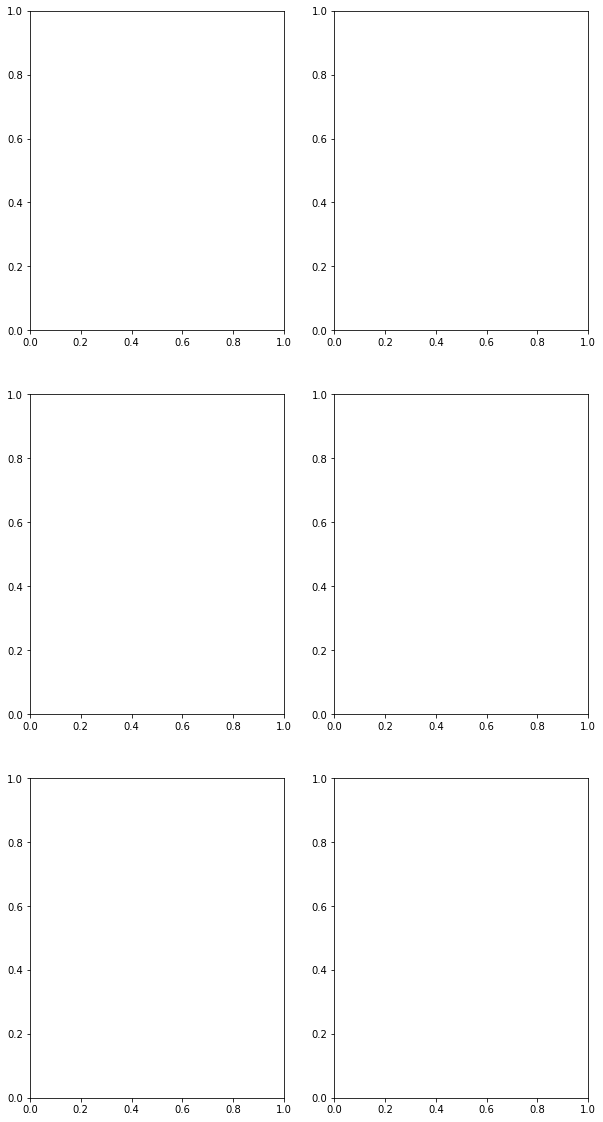

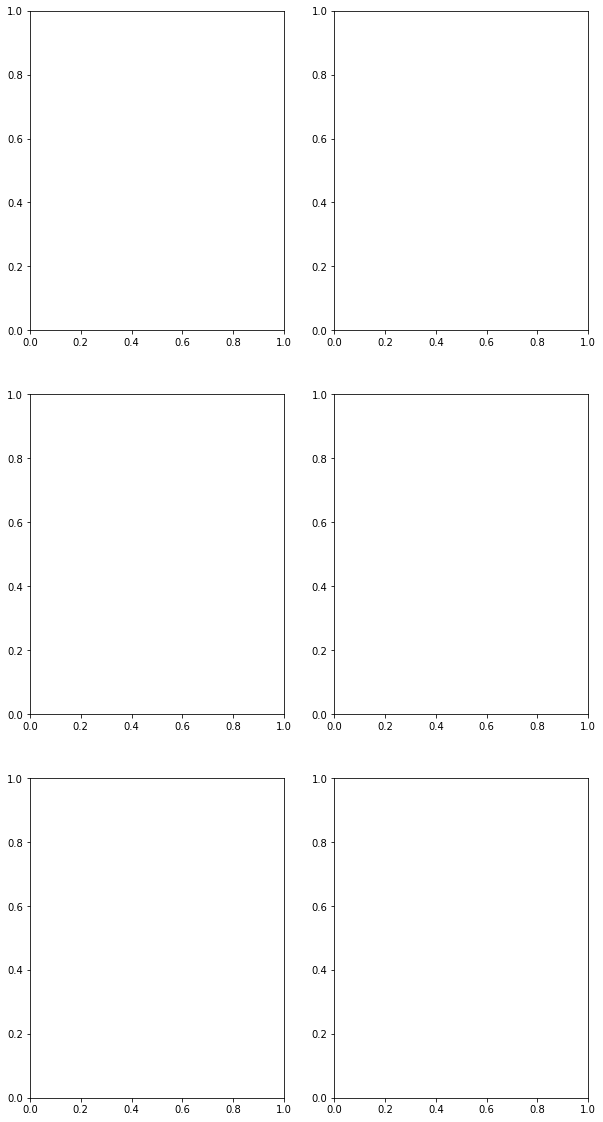

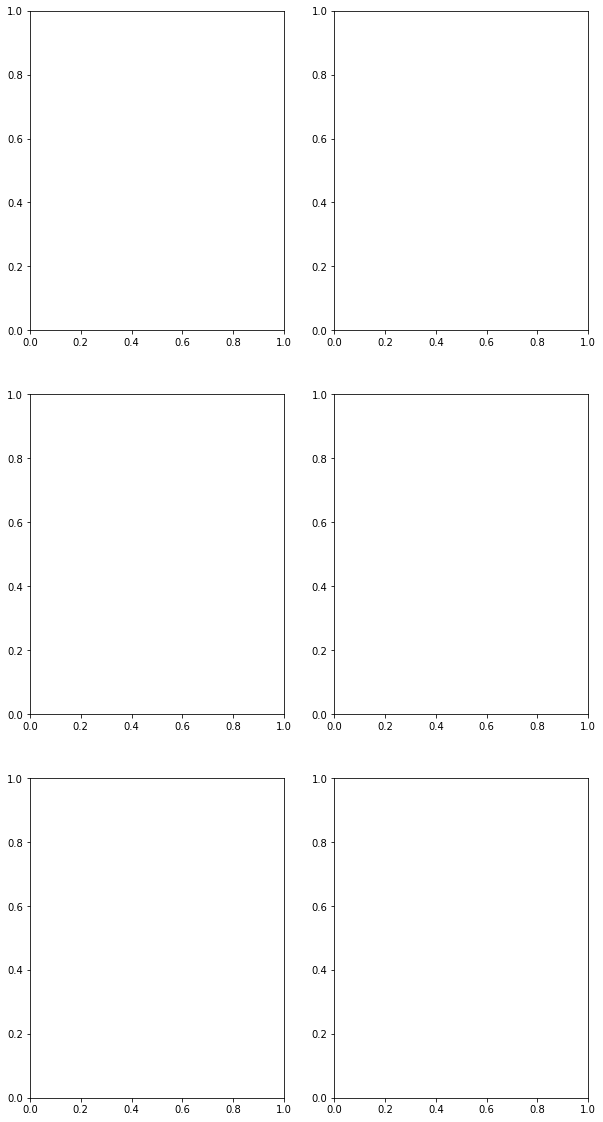

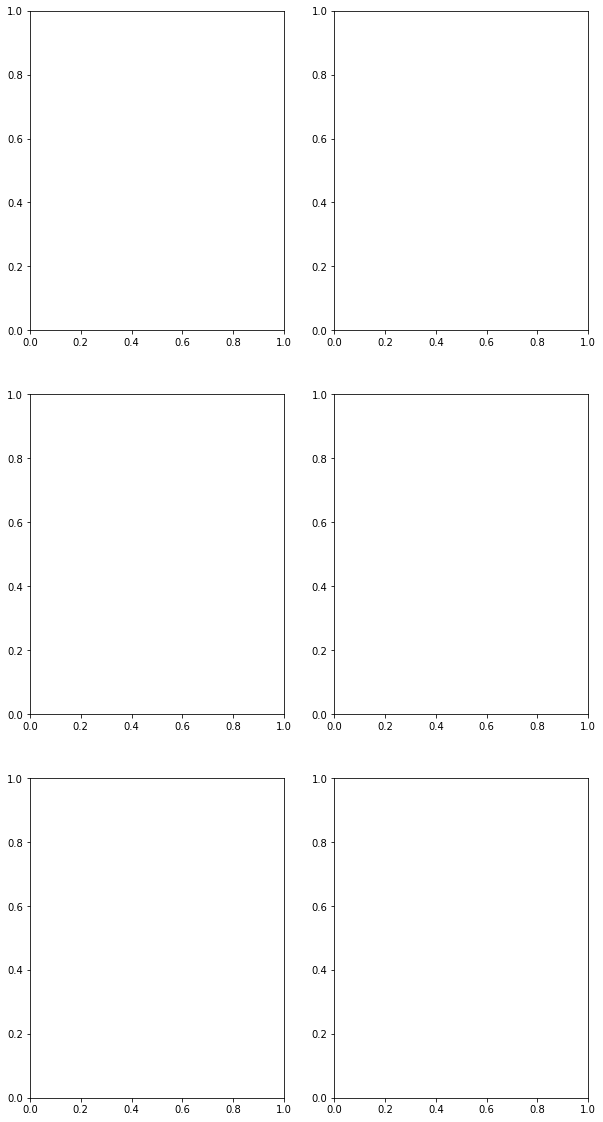

In [11]:
methods = ['lgb','LSTM','VAR','Kernel_RBF']

res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,dataset['data'],
                                    N_test=N_pred,
                                    method = meth,
                                    N_val = 5,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False)
    res_regre.append(Val_pred)

In [ ]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
_,_, Val_Pred = reg_pred_HMM_GMM(dataset['data'],
                       Data,
                       [0,5,10,15,28,35,50],
                       [N_states],
                       N_retrain = 10,
                       p=2,
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)
res_regre.append(Val_Pred)
methods.append('HHM_GGM2')

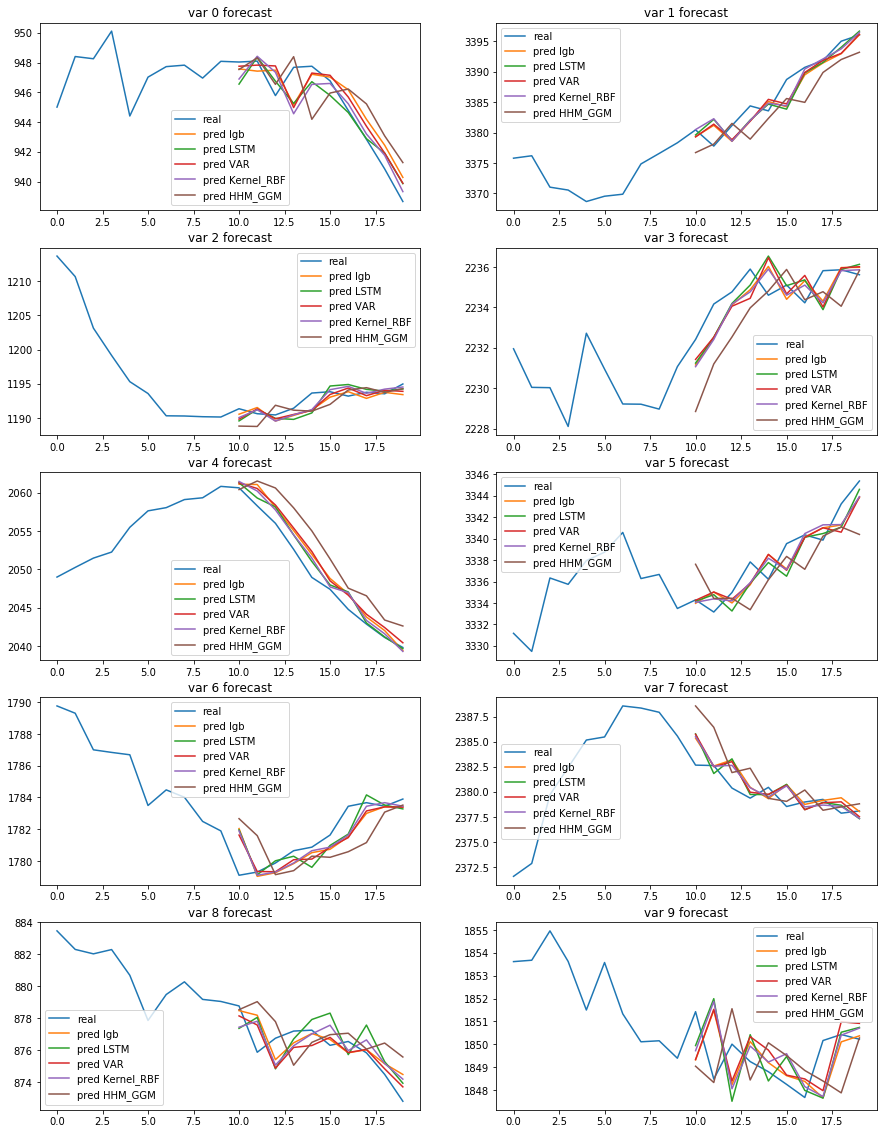

In [13]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))

for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')

        axes[i, j].legend()

In [20]:
# CV hmm_gmm 

hmm_gmm = HMM_GraphicalLasso(alpha=25,
                             n_clusters=N_states,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             repetitions=5,
                             n_jobs=-1)

hmm_gmm.fit(dataset['data'])

print(hmm_gmm.lambdas)

print(results_recap(dataset['states'],hmm_gmm.labels_,dataset['thetas'],hmm_gmm.precisions_))

[0.13424959 0.12673471 0.18566999 3.22796054 0.05272872]
{'homogeneity [0, 1]': 0.8670663420099415, 'completeness [0, 1]': 0.9145452842851869, 'v_measure [0, 1]': 0.8901731696672721, 'adjusted_mutual_info [0, 1]': 0.8894790359814645, 'weighted_mean_mcc [-1, 1]': (0.485164613052282,), 'max_cluster_mean_mcc[-1,1]': (0.508966424242636,), 'weighted_mean_f1 [0, 1]': (0.543169672020227,), 'max_cluster_mean_f1[0,1]': (0.5533272837265578,), 'probabilities_clusters': (array([[0.01092896, 0.98492462, 0.        , 0.        , 0.        ],
       [0.2295082 , 0.01005025, 0.0075188 , 0.        , 0.0041841 ],
       [0.00546448, 0.00502513, 0.98496241, 0.        , 0.        ],
       [0.7431694 , 0.        , 0.0075188 , 0.        , 0.0041841 ],
       [0.01092896, 0.        , 0.        , 1.        , 0.9916318 ]]),), 'max_probabilities_couples': ['Couple: (4, 3), Probability: 1.0, MCC: 0.4638062947716077, F1_score: 0.33333333333333337', 'Couple: (4, 4), Probability: 0.9916317991631799, MCC: 0.44082515

In [21]:
from regain.hmm.utils_pred import pred_HMM_GMM
returns = pred_HMM_GMM(dataset['data'],
                       Data,
                       [28],
                       [N_states],
                       N_retrain = 10,
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)

100%|██████████| 1/1 [00:46<00:00, 46.93s/it]


IndexError: index 1000 is out of bounds for axis 0 with size 1000

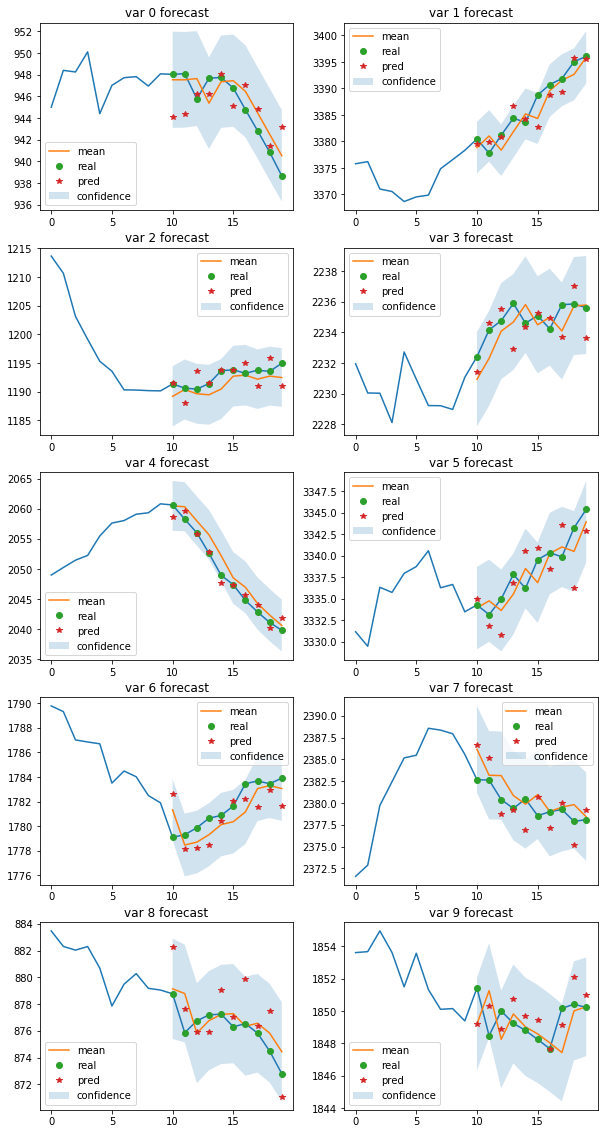

In [23]:
from regain.hmm.utils_pred import pred_from_N_past_days
res = pred_from_N_past_days(dataset['data'],Data,N_past_days=50,N_test=N_pred,pred_meth = 'rolling')

In [24]:
Value, Value_mean = Value_from_returns(Data, returns,N_pred, pred_meth='rolling', perc_var=False)

In [25]:
Value_res, Value_mean_res = Value_from_returns(Data, res,N_pred, pred_meth='rolling', perc_var=False)

In [26]:
res_regre.append(Value)
res_regre.append(Value_mean)
res_regre.append(Value_res)
res_regre.append(Value_mean_res)

In [27]:
methods.append('HMM-GMM')
methods.append('HMM-GMM mean')
methods.append('Last 50 days')
methods.append('Last 50 days mean')

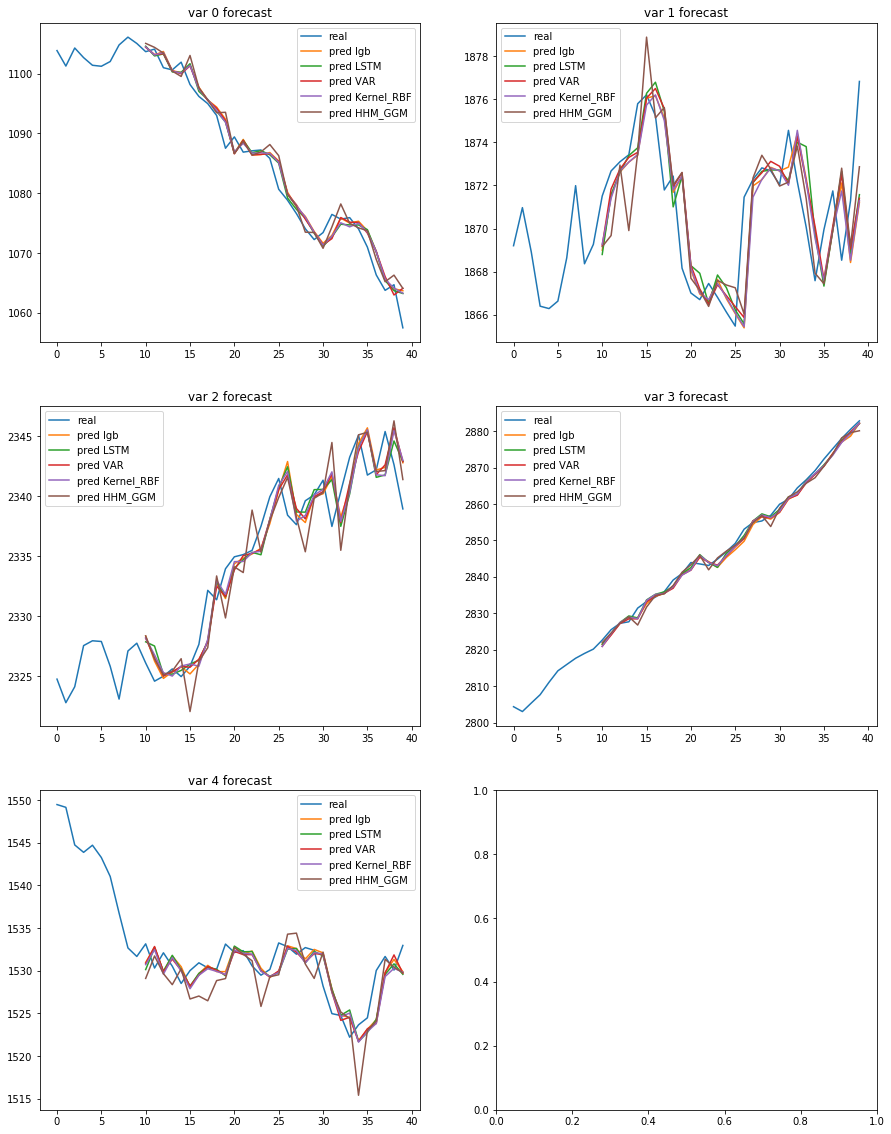

In [13]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [14]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [17]:
with open('Pred_K5.pickle', 'wb') as f:
    pkl.dump([dataset,df_recap], f)

In [15]:
df_recap.loc[df_recap['method'] == 'Kernel_RBF']['MAE'].mean()

1.6675811018999198

In [17]:
print(df_recap.to_string())

        method     TS       MAE    std AB
0          lgb  var 0  1.189596  0.732285
1         LSTM  var 0  1.241578  0.709419
2          VAR  var 0  1.127794  0.726024
3   Kernel_RBF  var 0  1.149853  0.670880
4      HHM_GGM  var 0  1.042380  0.767650
5          lgb  var 1  0.801201  0.580086
6         LSTM  var 1  0.782504  0.611004
7          VAR  var 1  0.757336  0.673566
8   Kernel_RBF  var 1  0.750449  0.620817
9      HHM_GGM  var 1  0.763302  0.575794
10         lgb  var 2  1.417680  0.782021
11        LSTM  var 2  1.495600  0.775257
12         VAR  var 2  1.404226  0.815828
13  Kernel_RBF  var 2  1.505719  0.759351
14     HHM_GGM  var 2  1.378624  0.810283
15         lgb  var 3  1.137024  0.865255
16        LSTM  var 3  1.072868  0.865416
17         VAR  var 3  1.157706  0.917624
18  Kernel_RBF  var 3  1.083433  0.869384
19     HHM_GGM  var 3  1.050484  0.862473
20         lgb  var 4  1.297417  0.844556
21        LSTM  var 4  1.188254  0.893718
22         VAR  var 4  1.228525  0

In [22]:
prec_real = {}

for i,k in enumerate(dataset['states'][-N_pred:]):
    prec_real[str(i)] = dataset['thetas'][k]

In [23]:
mcc, f1 = thetas_comparison(prec_real,returns[3])

0.7953949089757174
0.8386278693775346
0.8386278693775346
0.8386278693775346
0.7953949089757174
0.7953949089757174
-0.07354355067681902
0.42947784519366666
0.42947784519366666
1.0


In [24]:
print('mean MCC precision matrix forecast', mcc,'mean F1 precision matrix forecast', f1)

mean MCC precision matrix forecast 0.668748047477027 mean F1 precision matrix  forecast 0.701392360499912


In [25]:
mcc_last, f1_last = thetas_comparison(prec_real,res[3])

0.1091089451179962
0.1091089451179962
0.1322711693170675
0.07142857142857142
0.15537971921347118
0.1959983830200101
-0.20890725544918334
-0.13497638119975428
0.1392715036327889
0.09600307214746387


In [26]:
print('mean MCC precision matrix forecast', mcc_last,'mean F1 precision matrix  forecast', f1_last )

mean MCC precision matrix forecast 0.06646866723464277 mean F1 precision matrix  forecast 0.35151515151515156
